In [53]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import basicFunctions
import pandas as pd
import json

print(str(tf.__version__))
print(str(tf.keras.__version__))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.1.0
2.2.4-tf
Num GPUs Available:  1
Num CPUs Available:  1


In [54]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 14}
import matplotlib
matplotlib.rc('font', **font)


def plot_img(img, img_roi, xlabel, ylabel,xunits,yunits,img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,vmin=False,vmax=False):
    
    extent=img_roi
    fig,ax = plt.subplots(nrows=1, ncols=1)
    if vmin:
           ax.imshow(img.reshape(bins,bins), extent=extent,cmap='viridis',vmin=vmin,vmax=vmax)
    else:
        ax.imshow(img.reshape(bins,bins), extent=extent,cmap='viridis')
    rect = ax.patch
    rect.set_facecolor("#440154FF")
    ax.set_aspect('auto')
    ax.set_xlim((img_lim_xmin,img_lim_xmax))
    ax.set_ylim((img_lim_ymin,img_lim_ymax))
    plt.xlabel(xlabel+' '+xunits)
    plt.ylabel(ylabel+' '+yunits)
    #fig.aspect=
    plt.show()
    
def get_img_lim_ranges(img_roi):
    img_lim_xmax = np.max(img_roi,axis=0)[1]
    img_lim_ymax = np.max(img_roi,axis=0)[3]
    
    img_lim_xmin = np.min(img_roi,axis=0)[0]
    img_lim_ymin = np.min(img_roi,axis=0)[2]
    return img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax

def plot_img_row(img, img_roi, ax,a,title,xlabel,ylabel,xuntis,yunits,img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,vmin=False,vmax=False,axscale=True):
    
    extent=tuple(img_roi)
    
    if vmin:
        img=ax[a].imshow(img.reshape(bins,bins), extent=extent,cmap='viridis',vmin=vmin,vmax=vmax)
    else:
        img=ax[a].imshow(img.reshape(bins,bins), extent=extent,cmap='viridis')
    
    rect = ax[a].patch
    rect.set_facecolor("#440154FF")
    if axscale==True:
        ax[a].set_xlim((img_lim_xmin,img_lim_xmax))
        ax[a].set_ylim((img_lim_ymin,img_lim_ymax))
        ax[a].set_aspect('auto')
    #plt.xlabel(xlabel+' '+xunits)
    #plt.ylabel(ylabel+' '+yunits)
    ax[a].set_aspect('auto')
    
    plt.tight_layout()
    
    return ax,img



def x_projection(image, axis=0, subtract_baseline=True):
    """Expects ndarray, return x projection"""
    proj = np.sum(image, axis=0)
    if subtract_baseline:
        return proj - min(proj)

    return proj

def y_projection(image, subtract_baseline=True):
    """Expects ndarray, return y projection"""
    proj = np.sum(image, axis=1)
    if subtract_baseline:
        return proj - min(proj)
    
    return proj

In [55]:
PATH = "/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/UpdateMeasuredData/AstraSimDat/"
NAME = "scalar_and_image_combined_hybrid_080420_"

In [56]:
# PATH = "/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/UpdateMeasuredData/AstraSimDat/"
# NAME = "scalar_and_image_combined_042920_withlaser_"

In [57]:
inputs_raw = np.load(PATH+NAME+"inputs.npy")
outputs_raw = np.load(PATH+NAME+"outputs.npy")
inds_to_reserve = np.load("Indsfor1028Data.npy")


mask = np.zeros(np.shape(inputs_raw)[0],dtype=bool)
mask[inds_to_reserve] = True


inputs_raw = inputs_raw[:,1:]
print("before")
print(np.shape(inputs_raw))
print(np.shape(outputs_raw))

reserve_inputs = inputs_raw[mask,:]
reserve_outputs = outputs_raw[mask,:]

print("reserve")
print(np.shape(reserve_inputs))
print(np.shape(reserve_outputs))

inputs_raw = inputs_raw[~mask,:]
outputs_raw = outputs_raw[~mask,:]
print("train")
print(np.shape(inputs_raw))
print(np.shape(outputs_raw))
#### VARIABLE ORDERING IS VERY IMPORTANT AND NEEDS TO BE KEPT 

variable_names = ['maxb(2)', 'phi(1)', 'total_charge:value']
scalar_variables = len(variable_names)
output_names = ['end_core_emit_95percent_x', 'end_core_emit_95percent_y', 'end_core_emit_95percent_z', 'end_mean_kinetic_energy', 'end_mean_x', 'end_mean_y', 'end_n_particle_loss', 'end_norm_emit_x', 'end_norm_emit_y', 'end_norm_emit_z', 'end_sigma_x', 'end_sigma_xp', 'end_sigma_y', 'end_sigma_yp', 'end_sigma_z', 'end_total_charge']
scalar_outputs = len(output_names)



before
(79400, 2507)
(79400, 2520)
reserve
(12000, 2507)
(12000, 2520)
train
(67400, 2507)
(67400, 2520)


In [102]:
inputs_raw = np.load(PATH+NAME+"inputs.npy")
outputs_raw = np.load(PATH+NAME+"outputs.npy")
inputs_raw = inputs_raw[:,1:]

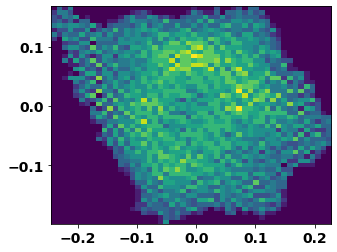

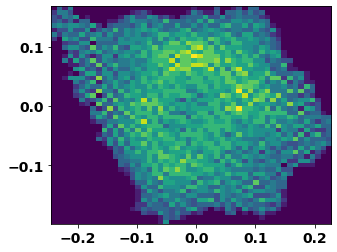

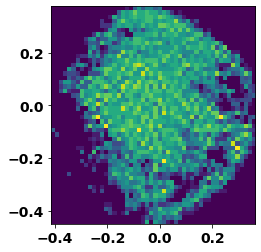

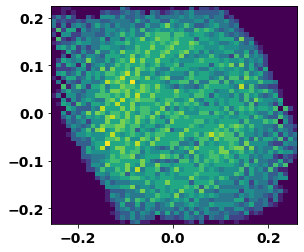

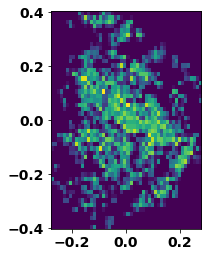

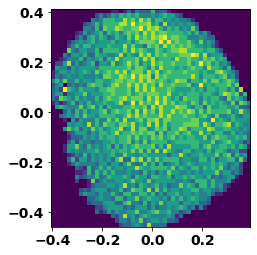

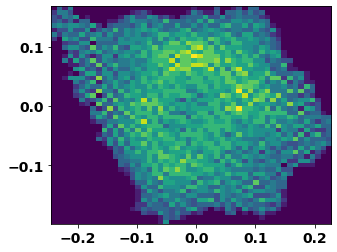

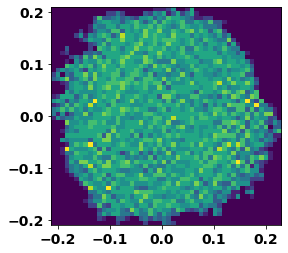

In [105]:
n = [10, 20, 2010, 4010, 7000, 9000, 1000, 13000]

for i in n: 
    plt.imshow(inputs_raw[i,(scalar_variables+4):].reshape(50,50), extent = inputs_raw[i, scalar_variables:scalar_variables+4]*1E3)
    plt.show()

In [58]:
print("The x range for input images is = {:.7f}m to {:.7f}m".format(np.min(inputs_raw[:,scalar_variables:scalar_variables+2]), np.max(inputs_raw[:,scalar_variables:scalar_variables+2])))
print("The y range for input images is = {:.7f}m to {:.7f}m".format(np.min(inputs_raw[:,scalar_variables+2:scalar_variables+4]), np.max(inputs_raw[:,scalar_variables+2:scalar_variables+4])))

print("The x range for output images is = {:.7f}m to {:.7f}m".format(np.min(outputs_raw[:,scalar_outputs:scalar_outputs+2]), np.max(outputs_raw[:,scalar_outputs:scalar_outputs+2])))
print("The y range for output images is = {:.7f}m to {:.7f}m".format(np.min(outputs_raw[:,scalar_outputs+2:scalar_outputs+4]), np.max(outputs_raw[:,scalar_outputs+2:scalar_outputs+4])))


The x range for input images is = -0.0004257m to 0.0005007m
The y range for input images is = -0.0006514m to 0.0006954m
The x range for output images is = -0.1240805m to 0.1220257m
The y range for output images is = -0.1229257m to 0.1254276m


In [59]:
print("The x range for input images is = {:.7f}m to {:.7f}m".format(np.min(reserve_inputs[:,scalar_variables:scalar_variables+2]), np.max(reserve_inputs[:,scalar_variables:scalar_variables+2])))
print("The y range for input images is = {:.7f}m to {:.7f}m".format(np.min(reserve_inputs[:,scalar_variables+2:scalar_variables+4]), np.max(reserve_inputs[:,scalar_variables+2:scalar_variables+4])))

print("The x range for output images is = {:.7f}m to {:.7f}m".format(np.min(reserve_outputs[:,scalar_outputs:scalar_outputs+2]), np.max(reserve_outputs[:,scalar_outputs:scalar_outputs+2])))
print("The y range for output images is = {:.7f}m to {:.7f}m".format(np.min(reserve_outputs[:,scalar_outputs+2:scalar_outputs+4]), np.max(reserve_outputs[:,scalar_outputs+2:scalar_outputs+4])))


The x range for input images is = -0.0004216m to 0.0003977m
The y range for input images is = -0.0004600m to 0.0004138m
The x range for output images is = -0.1166918m to 0.1134746m
The y range for output images is = -0.1129746m to 0.1149989m


In [60]:
for ind, name in enumerate(variable_names):
    print(ind, name, np.max(inputs_raw[:,ind]), np.min(inputs_raw[:,ind]))

0 maxb(2) 0.09999763542764864 2.744530188381056e-06
1 phi(1) 9.999571786554105 -9.999847945792807
2 total_charge:value 299.99058958428014 0.00419923557080093


In [61]:
for ind, name in enumerate(variable_names):
    print(ind, name, np.max(reserve_inputs[:,ind]), np.min(reserve_inputs[:,ind]))

0 maxb(2) 0.09999656264500588 7.276707018000206e-06
1 phi(1) 9.998797263920693 -9.999472679214852
2 total_charge:value 299.99023155630414 0.021530429060778733


In [62]:
for ind, name in enumerate(output_names):
    print(ind, name, np.max(outputs_raw[:,ind]), np.min(outputs_raw[:,ind]))

0 end_core_emit_95percent_x 1.7792999999999994e-05 5.2413e-08
1 end_core_emit_95percent_y 1.7763999999999998e-05 4.7690999999999993e-08
2 end_core_emit_95percent_z 2.6629000000000002e-05 6.6926e-08
3 end_mean_kinetic_energy 760160.0 746430.0
4 end_mean_x 0.0008974600000000002 -0.00058999
5 end_mean_y 0.00068095 -0.0010791
6 end_n_particle_loss 7914.0 0.0
7 end_norm_emit_x 2.4224e-05 6.409199999999999e-08
8 end_norm_emit_y 2.2292e-05 5.8275e-08
9 end_norm_emit_z 33.065 0.11416
10 end_sigma_x 0.054716999999999995 0.00013097
11 end_sigma_xp 0.049589 7.947500000000001e-05
12 end_sigma_y 0.048781 0.00012728
13 end_sigma_yp 0.044206 7.8779e-05
14 end_sigma_z 0.007611399999999999 0.0020050000000000003
15 end_total_charge 2.0564627540842189e-10 4.199235570800999e-15


In [63]:
for ind, name in enumerate(output_names):
    print(ind, name, np.max(reserve_outputs[:,ind]), np.min(reserve_outputs[:,ind]))

0 end_core_emit_95percent_x 1.6953e-05 9.3694e-08
1 end_core_emit_95percent_y 1.3067e-05 9.4828e-08
2 end_core_emit_95percent_z 2.1208e-05 6.7217e-08
3 end_mean_kinetic_energy 760140.0 746830.0
4 end_mean_x 0.0011944999999999998 -0.00038489
5 end_mean_y 0.0006557300000000001 -0.00017371000000000002
6 end_n_particle_loss 4315.0 0.0
7 end_norm_emit_x 2.2184e-05 1.1484e-07
8 end_norm_emit_y 1.7657e-05 1.1639e-07
9 end_norm_emit_z 26.5 0.11475
10 end_sigma_x 0.05220399999999999 0.00029380000000000004
11 end_sigma_xp 0.047409 0.00012354
12 end_sigma_y 0.047016 0.00027757
13 end_sigma_yp 0.042713 0.00011554
14 end_sigma_z 0.0071247 0.0020276
15 end_total_charge 1.951274189767167e-10 2.153042906078e-14


In [14]:
# basicFunctions.MakeAllHistograms(reserve_inputs,reserve_outputs, variable_names, output_names, nbins = 50)

In [64]:
inputs = keras.Input(shape=(50, 50, 1), name='img')
scalar_input = keras.Input(shape = (scalar_variables+4,))

x = layers.Conv2D(10, 4, activation='relu',strides=1,padding='same')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x) 
x = layers.Conv2D(10, 4, activation='relu',strides=1,padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)                 
x = layers.Conv2D(10, 4, activation='relu',strides=1,padding='same')(x)

x = layers.Flatten()(x)
x = layers.Concatenate()([x, scalar_input])

x = layers.Dense(512,activation='relu')(x)
x0 = layers.Dense(256,activation='relu')(x)

x = layers.Dense(512,activation='relu')(x)
x = layers.Dense(14*14*10,activation='relu')(x)
x = layers.Reshape((14,14,10))(x)
x = layers.Conv2D(10, 4, activation='relu',padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(10, 4, activation='relu',padding='valid')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(10, 4, activation='relu',padding='same')(x)
outputs = layers.Conv2D(1, 1, activation='relu',padding='same')(x)
scalar_output = layers.Dense(scalar_outputs+4,activation='linear')(x0)

model = keras.Model([inputs, scalar_input], [outputs, scalar_output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 50, 50, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 50, 50, 10)   170         img[0][0]                        
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 25, 25, 10)   0           conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 25, 25, 10)   1610        max_pooling2d_2[0][0]            
____________________________________________________________________________________________

In [65]:
model.compile(optimizer='adam',
              loss="mean_squared_error")

In [66]:
def image_scale(xdata):  
    x_scale = np.max(xdata)
    x_offset = 0
    scaled_x = ((xdata/x_scale)-x_offset)   
    return scaled_x, x_scale, x_offset
def image_unscale(image_values, image_scale, image_offset):  
    data_scaled = ((image_values+image_offset)*image_scale)  
    return data_scaled

In [18]:
# scaled_x, x_scales, x_offsets = basicFunctions.do_scaling(inputs_raw[:,0:scalar_variables+4],0, 1)
# scaled_x_img, x_scale_image, x_offset_image = image_scale(inputs_raw[:,(scalar_variables+4):])
# scaled_y, y_scales, y_offsets = basicFunctions.do_scaling(outputs_raw[:,0:scalar_outputs+4],0, 1)
# scaled_y_img, y_scale_image, y_offset_image = image_scale(outputs_raw[:,(scalar_outputs+4):])

In [19]:
# # print(np.min(scaled_x,axis=0))
# # print(np.max(scaled_x,axis=0))
# # print(np.min(scaled_x_img,axis=1))
# # print(np.max(scaled_x_img,axis=1))

# # print(np.min(scaled_y,axis=0))
# # print(np.max(scaled_y,axis=0))
# print(np.min(scaled_y_img, axis = 1))
# print(np.max(scaled_y_img, axis = 1))
# print(np.min(scaled_y_img, axis = 0))
# print(np.max(scaled_y_img, axis = 1))
# # print(scaled_x.shape)
# # print(scaled_y.shape)
# # print(scaled_x_img.shape)
# # print(scaled_y_img.shape)

In [20]:
# plt.imshow(scaled_y_img[1000,:].reshape(50,50), vmin = 0, vmax = np.max(scaled_y_img[1000,:]))
# print(np.max(scaled_y_img[1000,:]))

In [21]:
# x_scales.append(x_scale_image)
# x_offsets.append(x_offset_image)
# y_scales.append(y_scale_image)
# y_offsets.append(y_offset_image)
# X_RS = np.concatenate((scaled_x, scaled_x_img), axis = 1)
# Y_RS = np.concatenate((scaled_y, scaled_y_img), axis = 1)

In [22]:
# def new_do_scaling(xdata, lower, upper, scales, offsets):  
#     l,n = xdata.shape
#     scaled_x = np.zeros((l,n))

#     for i in range(n):
#         dat = xdata[:,i]
#         sc = scales[i]
#         off = offsets[i]
#         scaled = basicFunctions.scale_data(dat,off,sc,lower,upper)
#         scaled_x[:,i] = scaled
        
#     return scaled_x

# def new_image_scale(xdata, x_scale): 
#     x_offset = 0
#     scaled_x = ((xdata/x_scale)-x_offset)   
#     return scaled_x

In [23]:
### Scale reserved data using scales from the TESTING dataset

In [24]:
# reserve_scaled_x = new_do_scaling(reserve_inputs[:,0:scalar_variables+4],0, 1, x_scales, x_offsets)
# reserve_scaled_x_img = new_image_scale(reserve_inputs[:,(scalar_variables+4):], x_scale_image)
# reserve_scaled_y = new_do_scaling(reserve_outputs[:,0:scalar_outputs+4],0, 1, y_scales, y_offsets)
# reserve_scaled_y_img = new_image_scale(reserve_outputs[:,(scalar_outputs+4):], y_scale_image)

In [25]:
# nn = 500
# plt.imshow(reserve_scaled_y_img[nn,:].reshape(50,50), vmin = 0, vmax = np.max(reserve_scaled_y_img[nn,:]))
# print(np.max(reserve_scaled_y_img[nn,:]))

In [26]:
# # print(np.min(reserve_scaled_x,axis=0))
# # print(np.max(reserve_scaled_x,axis=0))
# # print(np.min(reserve_scaled_x_img,axis=1))
# # print(np.max(reserve_scaled_x_img,axis=1))


# # print(np.min(reserve_scaled_y,axis=0))
# # print(np.max(reserve_scaled_y,axis=0))
# # print(np.min(reserve_scaled_y_img, axis = 1))
# # print(np.max(reserve_scaled_y_img, axis = 1))
# # print(np.shape(reserve_scaled_x))
# # print(np.shape(reserve_scaled_y))
# # print(np.shape(reserve_scaled_x_img))
# # print(np.shape(reserve_scaled_y_img))

# print(np.min(reserve_scaled_y_img, axis = 1))
# print(np.max(reserve_scaled_y_img, axis = 1))
# print(np.min(reserve_scaled_y_img, axis = 0))
# print(np.max(reserve_scaled_y_img, axis = 0))

In [27]:
# X_RS_reserved = np.concatenate((reserve_scaled_x, reserve_scaled_x_img), axis = 1)
# Y_RS_reserved = np.concatenate((reserve_scaled_y, reserve_scaled_y_img), axis = 1)

In [28]:
# np.shape(X_RS_reserved)

In [29]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_RS, Y_RS, test_size=0.2, random_state=42)
# X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)

# X_test = X_RS_reserved
# Y_test = Y_RS_reserved




# # print(np.shape(Y_train))
# # print(np.shape(Y_val))
# # print(np.shape(Y_test))



In [67]:
MODEL_NAME = "CNN_081220_removed1028_"


X_train = np.load(PATH+MODEL_NAME+"inputs_train.npy")
X_val = np.load(PATH+MODEL_NAME+"inputs_val.npy")
X_test = np.load(PATH+MODEL_NAME+"inputs_test.npy")

Y_train = np.load(PATH+MODEL_NAME+"outputs_train.npy")
Y_val = np.load(PATH+MODEL_NAME+"outputs_val.npy")
Y_test = np.load(PATH+MODEL_NAME+"outputs_test.npy")

x_scales = np.load(PATH+MODEL_NAME+"_x_scales.npy")
y_scales = np.load(PATH+MODEL_NAME+"_y_scales.npy")
x_offsets = np.load(PATH+MODEL_NAME+"_x_offsets.npy")
y_offsets = np.load(PATH+MODEL_NAME+"_y_offsets.npy")

# np.save(PATH+MODEL_NAME+"_x_scales.npy", x_scales)
# np.save(PATH+MODEL_NAME+"_y_scales.npy", y_scales)
# np.save(PATH+MODEL_NAME+"_x_offsets.npy", x_offsets)
# np.save(PATH+MODEL_NAME+"_y_offsets.npy", y_offsets)

# np.save(PATH+MODEL_NAME+"inputs_train.npy", X_train)
# np.save(PATH+MODEL_NAME+"inputs_val.npy", X_val)
# np.save(PATH+MODEL_NAME+"inputs_test.npy", X_test)

# np.save(PATH+MODEL_NAME+"outputs_train.npy", Y_train)
# np.save(PATH+MODEL_NAME+"outputs_val.npy", Y_val)
# np.save(PATH+MODEL_NAME+"outputs_test.npy", Y_test)


print("train")
print(np.shape(X_train))
print("val")
print(np.shape(X_val))
print("test")
print(np.shape(X_test))

train
(53920, 2507)
val
(6740, 2507)
test
(12000, 2507)


In [122]:

# # basicFunctions.MakeAllHistograms(X_test[:,0:scalar_variables],Y_test[:,0:scalar_outputs], variable_names, output_names)
# for i in range(200):
#     ind = np.random.randint(np.shape(X_test)[0])
#     #print(ind)
#     plt.imshow(X_test[ind, scalar_variables+4:].reshape(50,50), extent = X_unscale_test_scalar[ind, scalar_variables:scalar_variables+4]*1E3)
#     print(np.max(X_test[ind, scalar_variables+4:]))
#     plt.xlabel('mm')
#     plt.ylabel('mm')
#     #print(np.min(X_test[ind, scalar_variables+4:]))
#     plt.show()
    
# #     plt.imshow(Y_test[ind, scalar_outputs+4:].reshape(50,50))
# #     print(np.max(Y_test[ind, scalar_outputs+4:]))
# #     print(np.min(Y_test[ind, scalar_outputs+4:]))
# #     plt.show()

In [30]:
# n = 10
# plt.figure(figsize = (10,4))
# plt.hist(outputs_raw[:,n]*1E3, range = (0,10), bins = 20)
# plt.title("Training Data Distribution: " + output_names[n])
# plt.xlabel("millimeter")

# n = 12
# plt.figure(figsize = (10,4))
# plt.hist(outputs_raw[:,n]*1E3, range = (0,10), bins = 20)
# plt.title("Training Data Distribution: " +output_names[n])
# plt.xlabel("millimeter")

In [31]:
# n = 3
# plt.figure(figsize = (10,4))
# plt.hist(outputs_raw[:,n], bins = 20)
# plt.title("Training Data Distribution: " + output_names[n])
# plt.xlabel("millimeter")

# n = n+4
# plt.figure(figsize = (10,4))
# plt.hist(outputs_raw[:,n]*1E6, bins = 20, range = (0,5))
# plt.title("Training Data Distribution: " +output_names[n])
# plt.xlabel("millimeter")

In [69]:
X_train_img = X_train[:,(scalar_variables+4):].reshape(X_train.shape[0],50,50,1)
X_train_s = X_train[:,0:(scalar_variables+4)]

X_val_img = X_val[:,(scalar_variables+4):].reshape(X_val.shape[0],50,50,1)
X_val_s = X_val[:,0:(scalar_variables+4)]

X_test_img = X_test[:,(scalar_variables+4):].reshape(X_test.shape[0],50,50,1)
X_test_s = X_test[:,0:(scalar_variables+4)]

# X_test_img = reserve_scaled_x_img.reshape(reserve_scaled_x_img.shape[0],50,50,1)
# X_test_s = reserve_scaled_x


print(np.shape(X_test_img))
print(np.shape(X_test_s))
###

Y_train_img = Y_train[:,(scalar_outputs+4):].reshape(Y_train.shape[0],50,50,1)
Y_train_s = Y_train[:,0:(scalar_outputs+4)]

Y_val_img = Y_val[:,(scalar_outputs+4):].reshape(Y_val.shape[0],50,50,1)
Y_val_s = Y_val[:,0:(scalar_outputs+4)]

Y_test_img = Y_test[:,(scalar_outputs+4):].reshape(Y_test.shape[0],50,50,1)
Y_test_s = Y_test[:,0:(scalar_outputs+4)]


print(np.shape(Y_test_img))
print(np.shape(Y_test_s))



(12000, 50, 50, 1)
(12000, 7)
(12000, 50, 50, 1)
(12000, 20)


In [70]:
model.load_weights(PATH+MODEL_NAME+"Initial_Model_Save.h5")
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 50, 50, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 50, 50, 10)   170         img[0][0]                        
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 25, 25, 10)   0           conv2d_7[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 25, 25, 10)   1610        max_pooling2d_2[0][0]            
____________________________________________________________________________________________

In [71]:
# import h5py


# start = time.time()
# mc = tf.keras.callbacks.ModelCheckpoint(PATH+MODEL_NAME+'best_model_chk.h5', monitor='val_loss', mode='min', save_best_only=True)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", verbose=1, patience=250)

# history = model.fit(x=[X_train_img, X_train_s], y=[Y_train_img, Y_train_s], validation_data=([X_val_img, X_val_s],[Y_val_img,Y_val_s]),batch_size=100, shuffle='true',epochs=5000, verbose='false', callbacks=[mc, es, basicFunctions.plot_losses])

# history_df = pd.DataFrame(history.history)
 
# hist_csv_file = PATH+MODEL_NAME+'History.csv'
# with open(hist_csv_file, mode='w') as f:
#     history_df.to_csv(f)
    
# with open(PATH+MODEL_NAME+'model_architecture.json', 'w') as f:
#     f.write(model.to_json())
# model.save_weights(PATH+MODEL_NAME+"Initial_Model_Save.h5")
# stop = time.time()

# import shutil


# description_file = "description-image.json"
# basicFunctions.mySaveModel(PATH+MODEL_NAME+"Initial_Model_Save.h5",
#             description_file,
#             PATH+MODEL_NAME+"model_architecture.json",
#             x_scales,
#             x_offsets,
#             y_scales,
#             y_offsets, lower = 0, upper = 1)
# shutil.copy(PATH+MODEL_NAME+"Initial_Model_Save.h5", PATH+MODEL_NAME+"SurrogateModel.h5")

# print('Time to run in minutes was: ', (stop-start)/60) 

In [72]:
PATH+MODEL_NAME+"SurrogateModel.h5"

'/gpfs/slac/staas/fs1/g/accelerator_modeling/lgupta/datasets/UpdateMeasuredData/AstraSimDat/CNN_081220_removed1028_SurrogateModel.h5'

In [73]:
### resave the test data!!!

In [74]:
X_unscale_test_scalar = basicFunctions.do_unscaling(X_test_s, 0, 1, x_scales, x_offsets)
X_unscale_test_img = image_unscale(X_test_img.reshape(X_test_img.shape[0],2500), x_scales[-1], x_offsets[-1])

In [75]:
print(np.shape(X_unscale_test_scalar))
print(np.shape(Y_test_s))

(12000, 7)
(12000, 20)


In [76]:
Y_predicted = model.predict([X_test_img, X_test_s])

Y_unscale_test_scalar = basicFunctions.do_unscaling(Y_test_s, 0, 1, y_scales, y_offsets)
print(np.shape(Y_unscale_test_scalar))
Y_unscale_test_img = image_unscale(Y_test_img.reshape(Y_test_img.shape[0],2500), y_scales[-1], y_offsets[-1])
print(np.shape(Y_unscale_test_img))

Y_pred_s = Y_predicted[1]
Y_pred_img = Y_predicted[0]

Y_unscale_pred_scalar = basicFunctions.do_unscaling(Y_pred_s, 0, 1, y_scales, y_offsets)
Y_unscale_pred_img = image_unscale(Y_pred_img.reshape(Y_pred_img.shape[0],2500), y_scales[-1], y_offsets[-1])
print(np.shape(Y_unscale_pred_scalar))
print(np.shape(Y_unscale_pred_img))

(12000, 20)
(12000, 2500)
(12000, 20)
(12000, 2500)


In [77]:
## perform statistics on the test set: 
def perform_test_set_evaluation(ind):   
    scale = 1E3

    laser = X_unscale_test_img[ind].reshape(50,50)
    laser_extent = X_unscale_test_scalar[ind,scalar_variables:scalar_variables+4]*scale


    electrons_test = Y_unscale_test_img[ind].reshape(50,50)
    electrons_extent_test = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*scale

    electrons_predicted = Y_unscale_pred_img[ind].reshape(50,50)
    electrons_extent_predicted = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3


    eletrons_residual = electrons_test - electrons_predicted
    eletrons_residual_percent_error = 100*eletrons_residual.flatten()/np.max(electrons_test.flatten())
    electrons_redidual_std = 100*np.std(eletrons_residual.flatten()/np.max(electrons_test.flatten()))


    scalar_output_percent_error = 100*(Y_unscale_pred_scalar[ind,:] - Y_unscale_test_scalar[ind,:])/Y_unscale_test_scalar[ind,:]

    di = {"laser":laser,
        "laser_extent":laser_extent,
        "electrons_test":electrons_test,
        "electrons_extent_test":electrons_extent_test,
        "electrons_predicted":electrons_predicted,
        "electrons_extent_predicted":electrons_extent_predicted,
        "eletrons_residual":eletrons_residual,
        "eletrons_residual_percent_error":eletrons_residual_percent_error,
        "electrons_redidual_std":electrons_redidual_std,
        "scalar_output_percent_error":scalar_output_percent_error}
    return di

In [78]:
all_test = {}
for i in range(np.shape(Y_test_s)[0]):
    di = perform_test_set_evaluation(i)
    all_test[str(i)] = di


/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


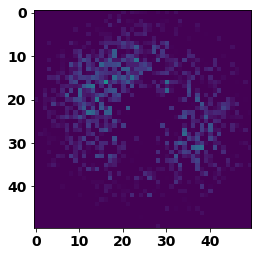

In [79]:
plt.imshow(all_test['0']["eletrons_residual"].reshape(50,50), vmin = 0, vmax = np.max(all_test['0']["electrons_test"]))

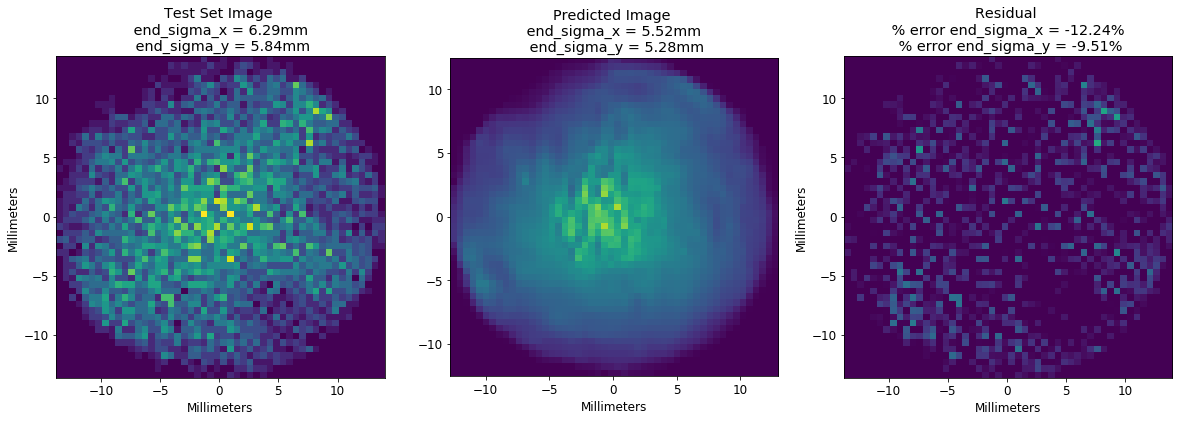

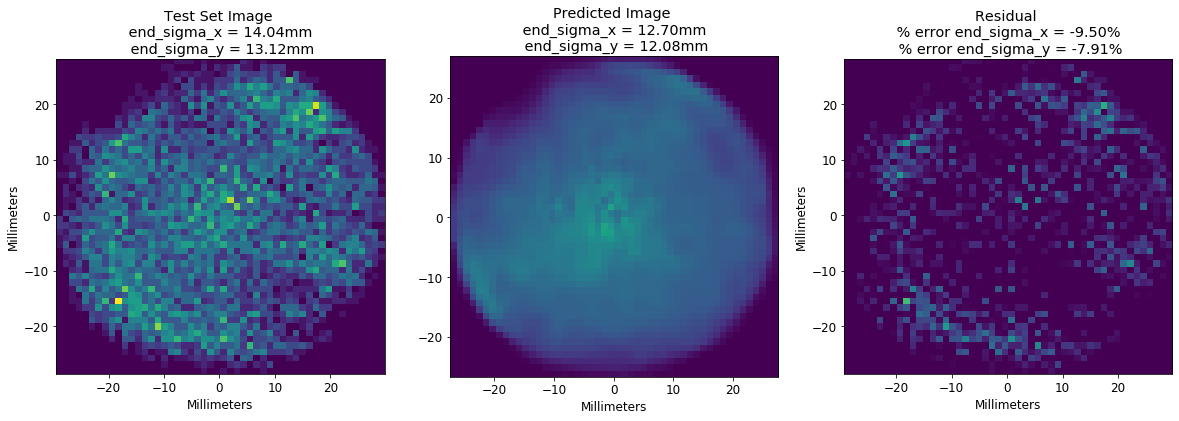

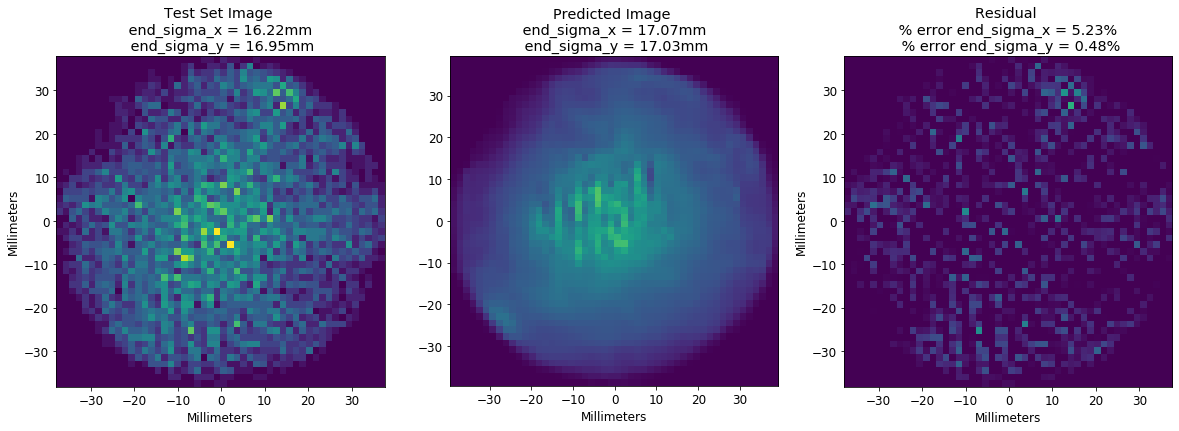

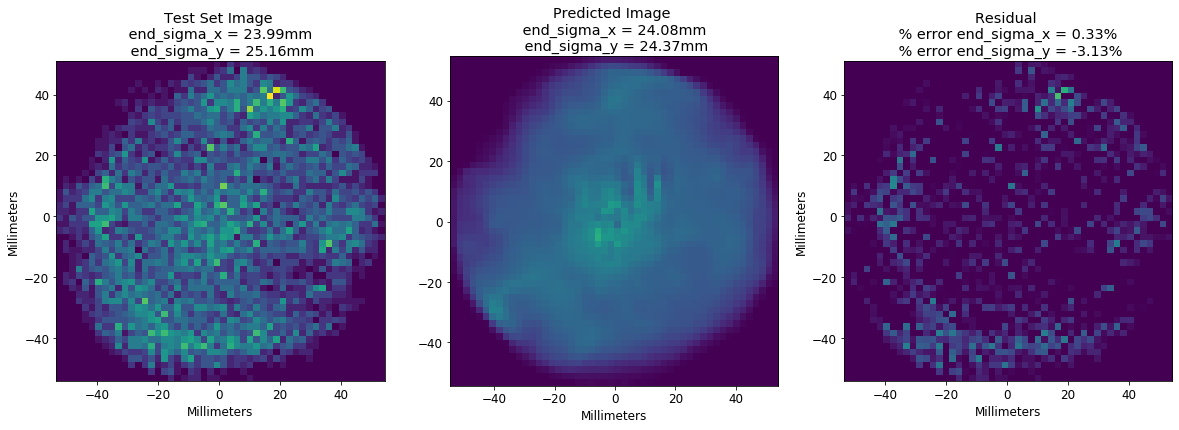

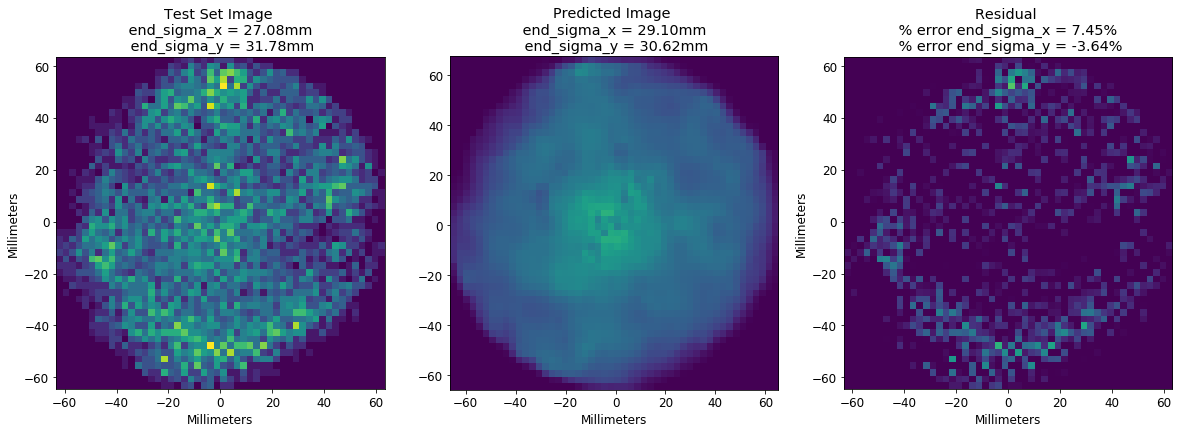

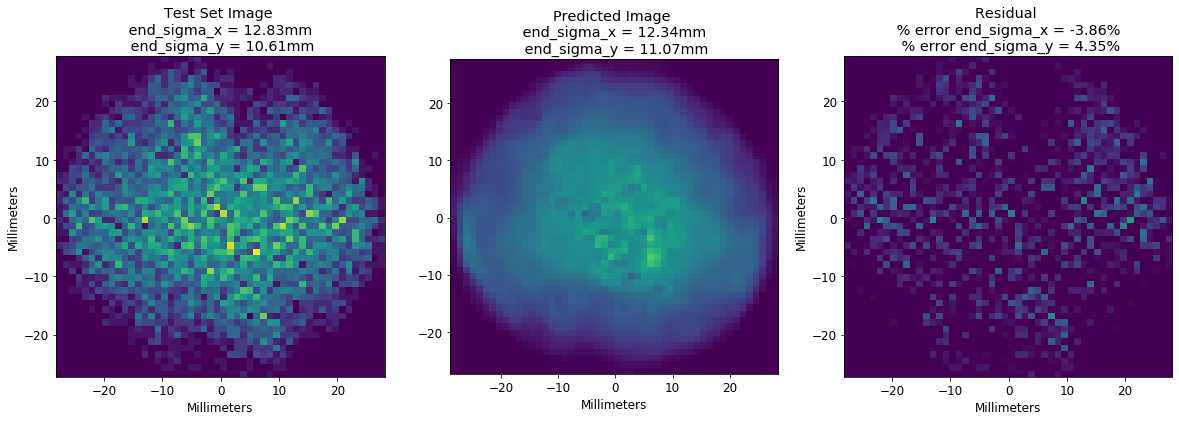

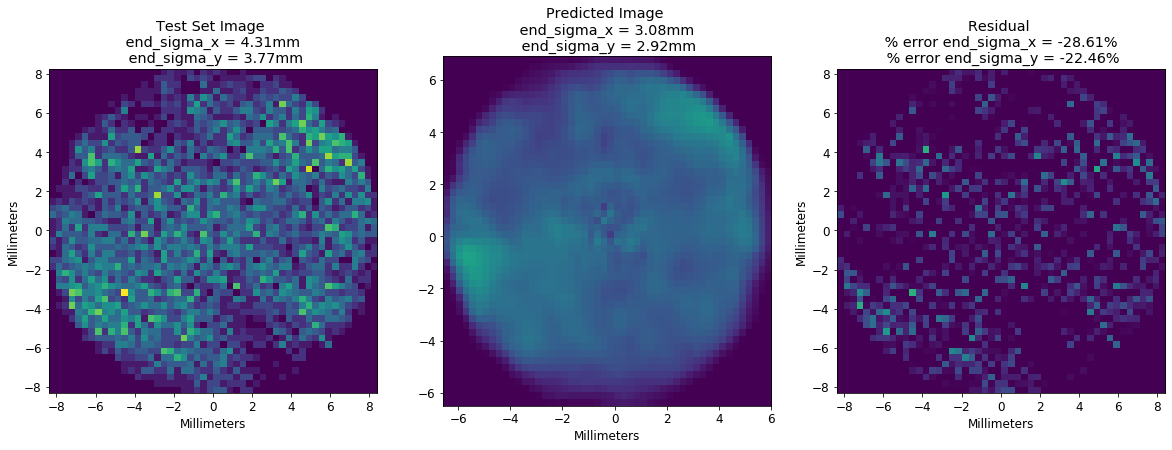

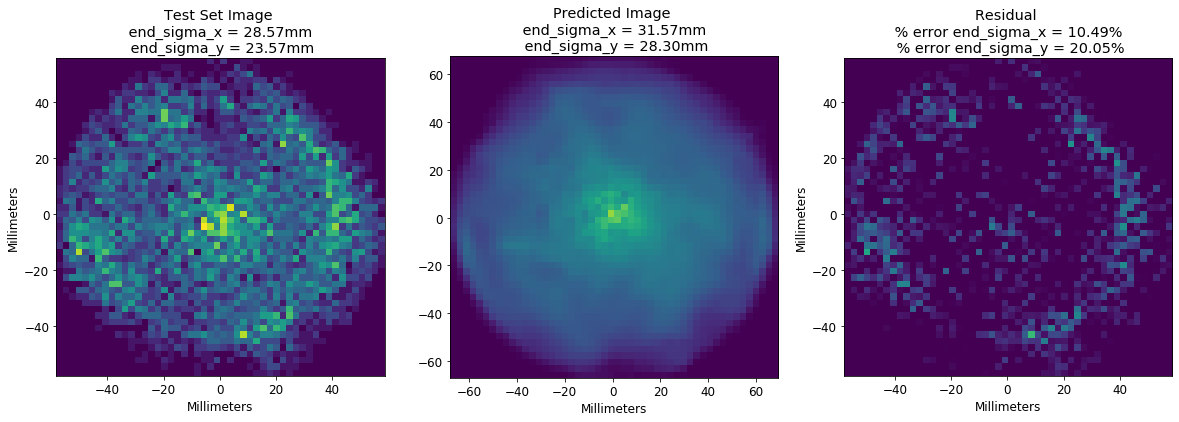

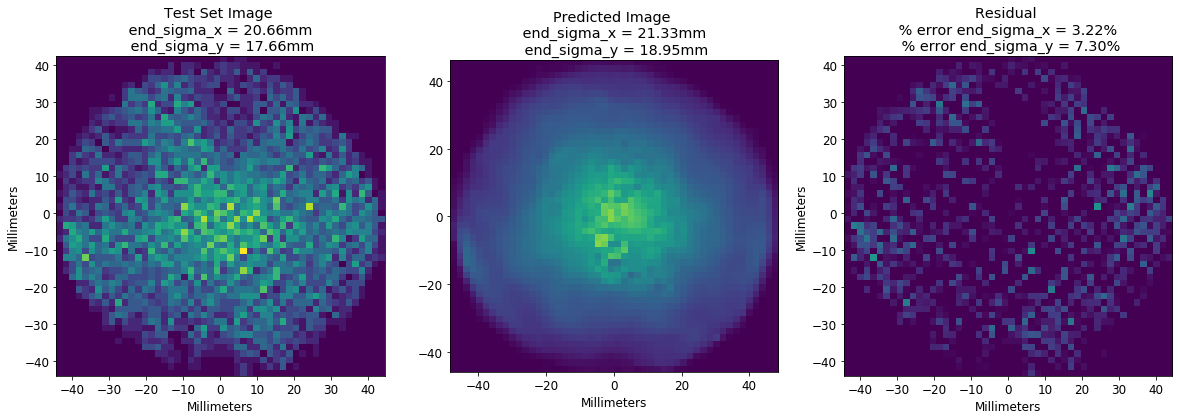

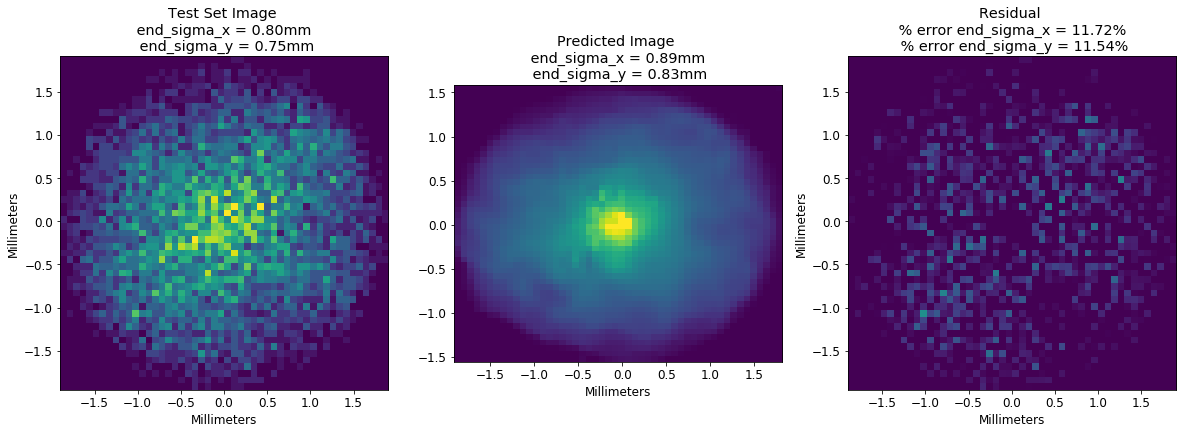

In [80]:
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 12}
import matplotlib
matplotlib.rc('font', **font)
for i in range(10):
    ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,12))
    #fig.suptitle('Sig_x = {:.2f} mm, Phi(1) = {:.2f} degrees, Charge = {:.2f} pC, Max B Solenoid = {:.2f} T'.format(X_unscale_test_scalar[ind,0], X_unscale_test_scalar[ind,2],X_unscale_test_scalar[ind,3],X_unscale_test_scalar[ind,1] )
    
    im = ax1.imshow(Y_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
    ax1.set_xlabel('Millimeters')
    ax1.set_ylabel('Millimeters')
    ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
    ax2.set_xlabel('Millimeters')
    ax1.set_ylabel('Millimeters')
    
    
    res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
    ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
    yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
    ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
    ax3.set_xlabel('Millimeters')
    ax3.set_ylabel('Millimeters')
    plt.show()


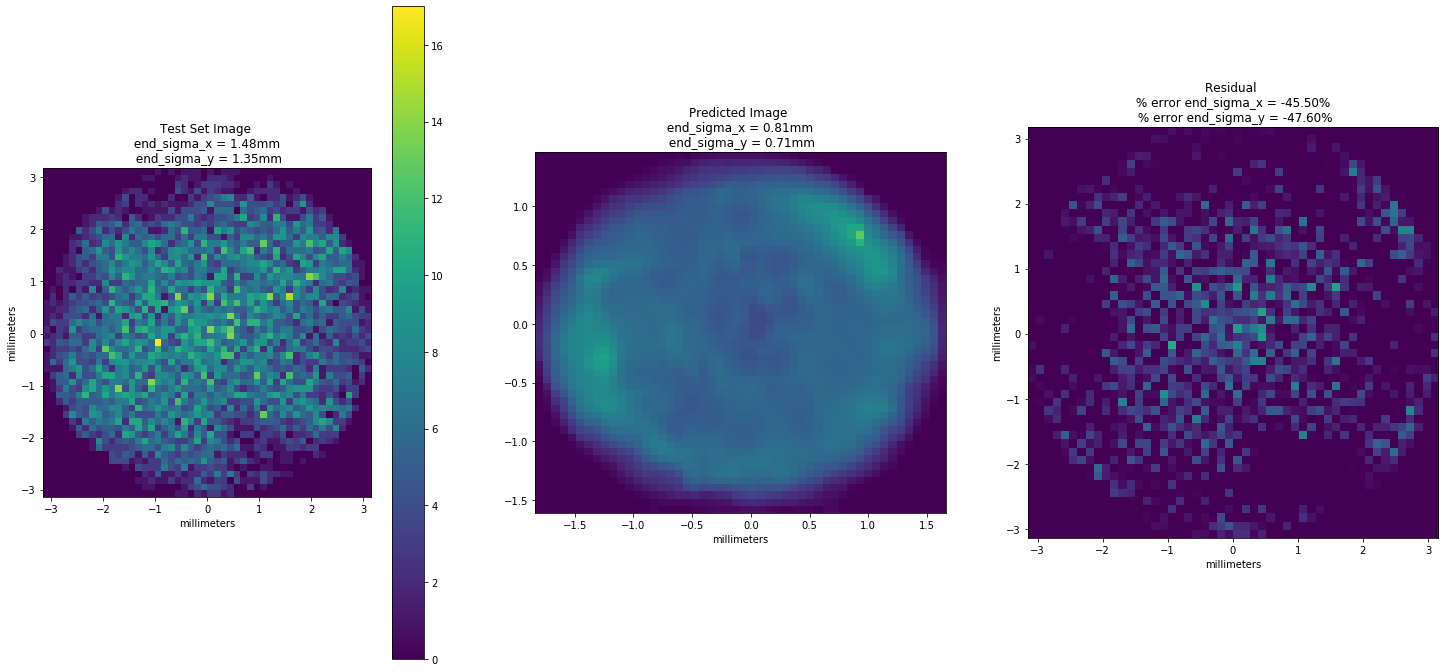

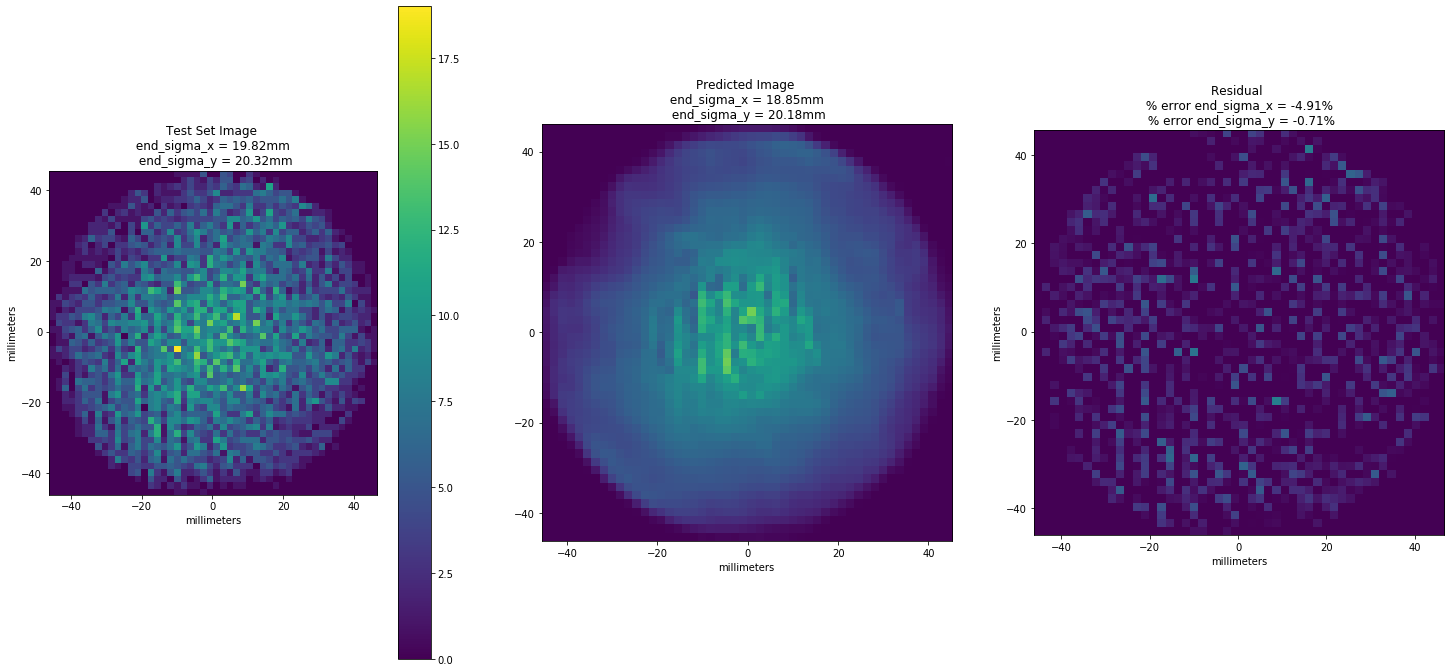

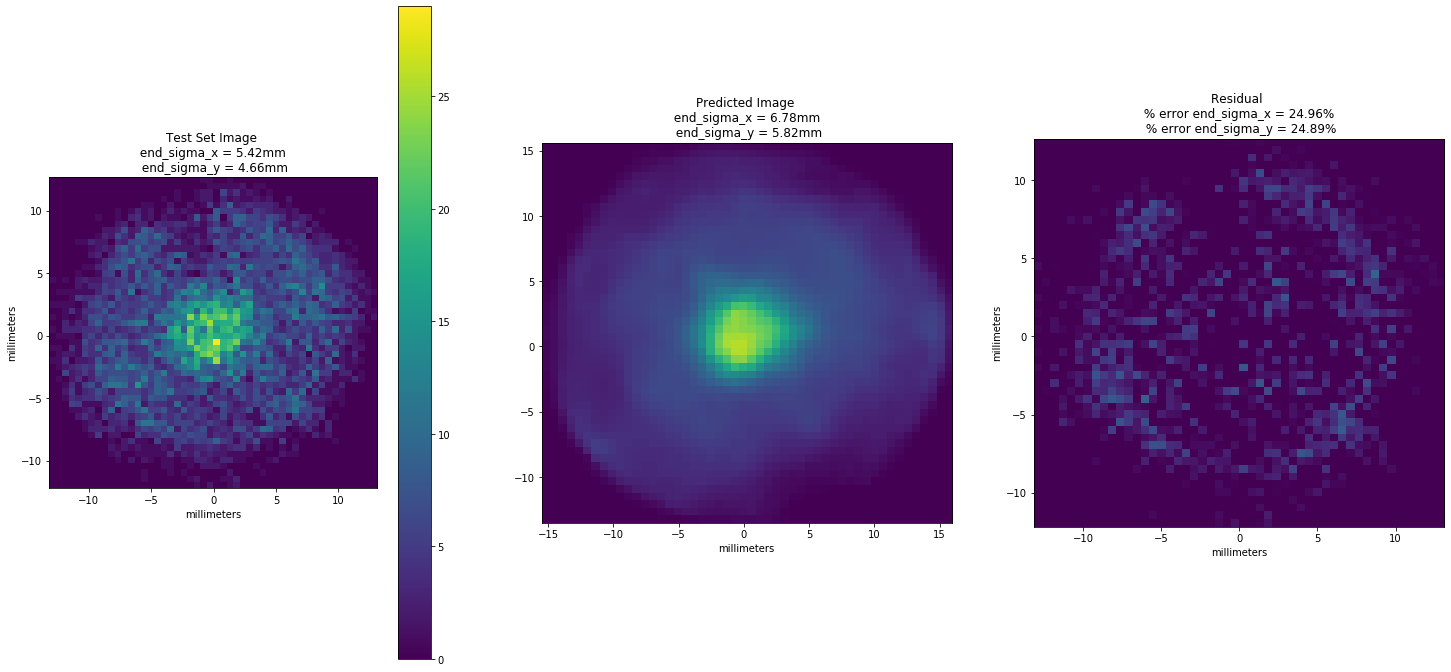

In [41]:
# font = {'family' : 'sans-serif',
#         'weight' : 'regular',
#         'size'   : 10}
# import matplotlib
# matplotlib.rc('font', **font)
# for i in range(3):
#     ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,12))
#     #fig.suptitle('Sig_x = {:.2f} mm, Phi(1) = {:.2f} degrees, Charge = {:.2f} pC, Max B Solenoid = {:.2f} T'.format(X_unscale_test_scalar[ind,0], X_unscale_test_scalar[ind,2],X_unscale_test_scalar[ind,3],X_unscale_test_scalar[ind,1] )
    
#     im = ax1.imshow(Y_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
#     ax1.set_xlabel('millimeters')
#     ax1.set_ylabel('millimeters')
#     ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
#     ax2.set_xlabel('millimeters')
#     ax1.set_ylabel('millimeters')
    
    
#     res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
#     ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
#     yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
#     ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
#     ax3.set_xlabel('millimeters')
#     ax3.set_ylabel('millimeters')
#     plt.colorbar(im, ax = ax1, orientation='vertical')
#     plt.show()


3853


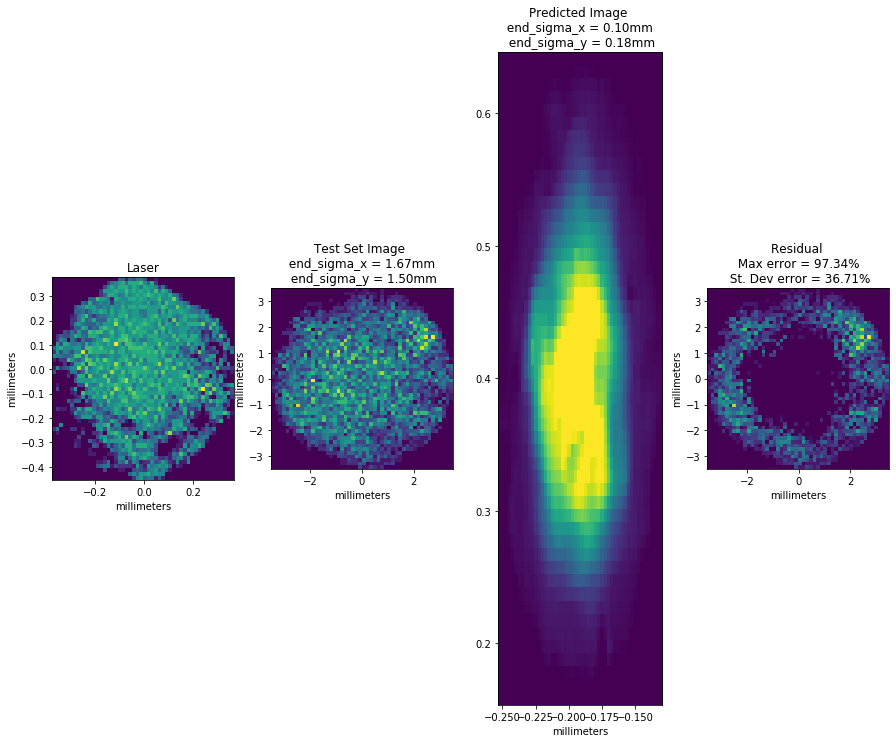

15.0
(2500,)


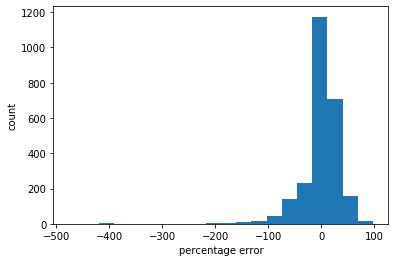

749


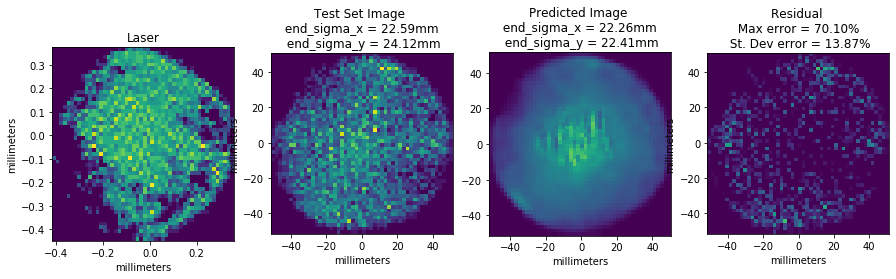

17.0
(2500,)


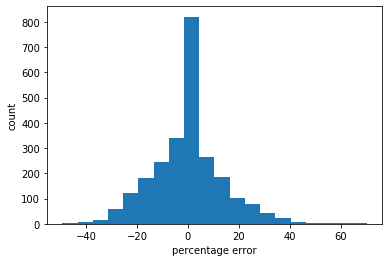

3496


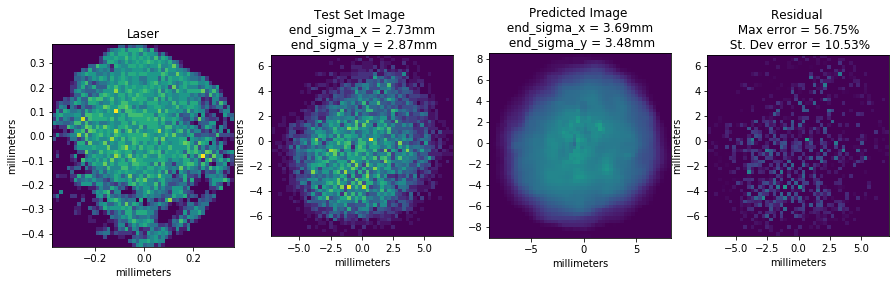

21.0
(2500,)


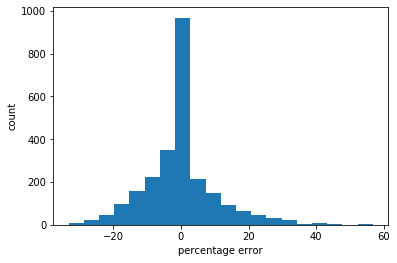

652


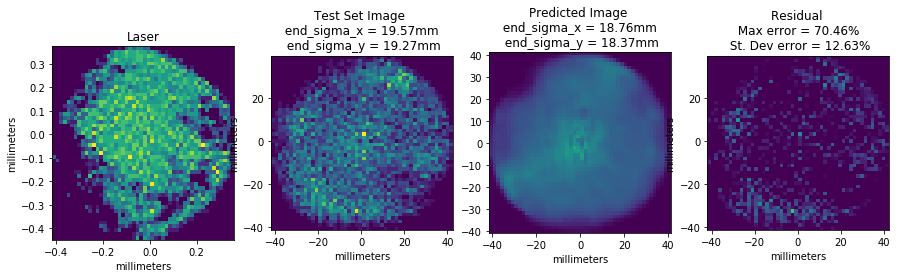

18.0
(2500,)


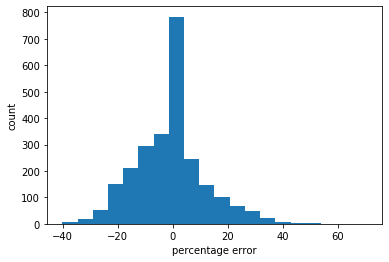

532


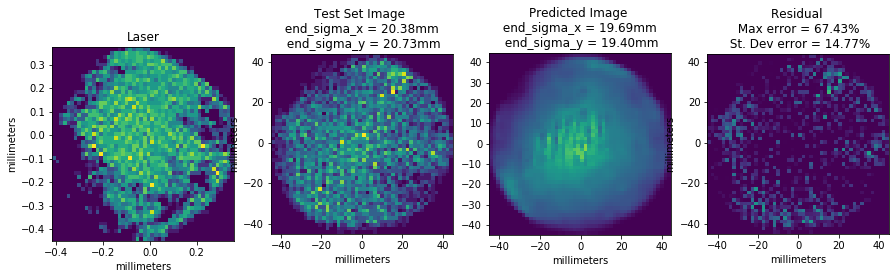

16.0
(2500,)


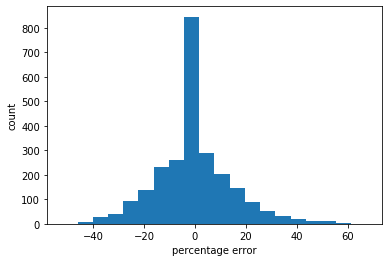

536


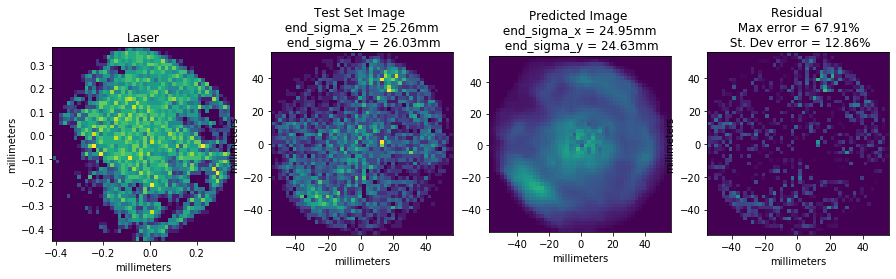

14.000000000000002
(2500,)


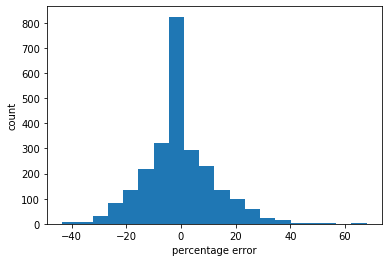

3060


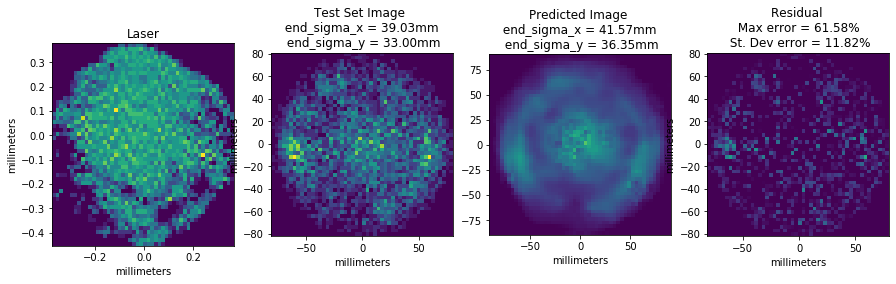

15.0
(2500,)


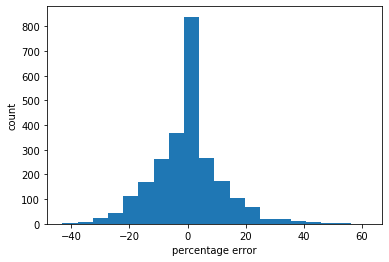

7238


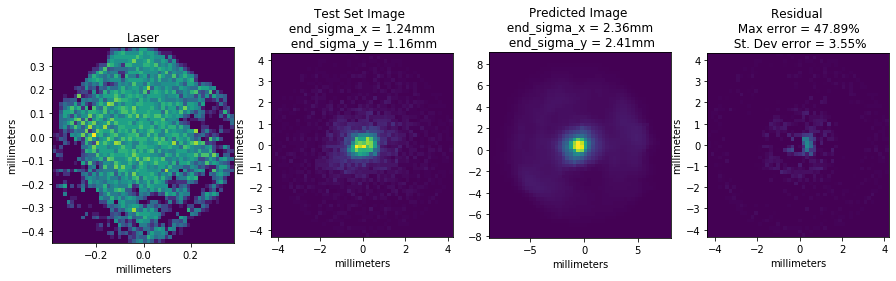

92.0
(2500,)


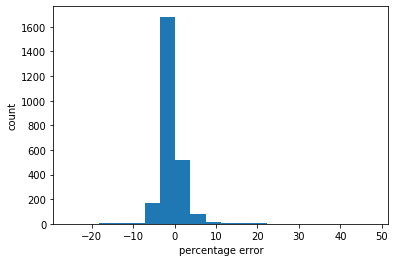

4771


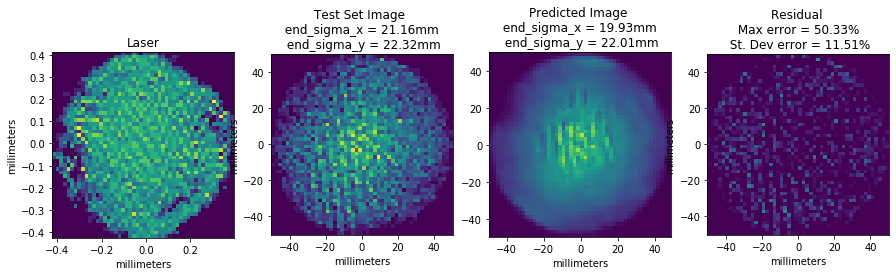

17.0
(2500,)


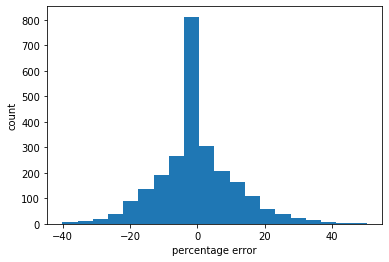

6246


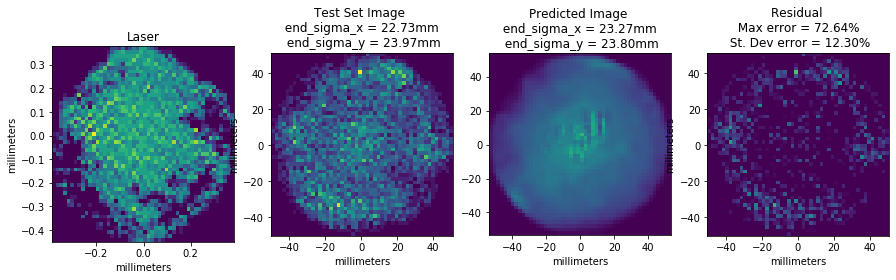

19.0
(2500,)


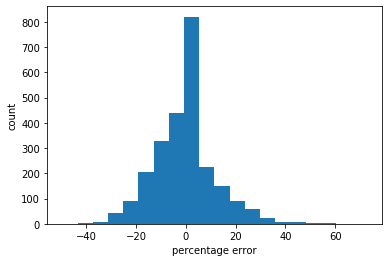

In [81]:
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 10}
import matplotlib
matplotlib.rc('font', **font)
for i in range(10):
    ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])
    print(ind)
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize = (15,12))
    #fig.suptitle('Sig_x = {:.2f} mm, Phi(1) = {:.2f} degrees, Charge = {:.2f} pC, Max B Solenoid = {:.2f} T'.format(X_unscale_test_scalar[ind,0], X_unscale_test_scalar[ind,2],X_unscale_test_scalar[ind,3],X_unscale_test_scalar[ind,1] ))
    #print(X_unscale_test_scalar[ind,0:scalar_variables+4])
    #print(X_test_s[ind,0:scalar_variables+4])
    ax0.imshow(X_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(X_unscale_test_img[ind].reshape(50,50)), origin = "upper", extent = X_unscale_test_scalar[ind,scalar_variables:scalar_variables+4]*1E3)
    ax0.set_title("Laser")
    ax0.set_xlabel('millimeters')
    ax0.set_ylabel('millimeters')
    
    ax1.imshow(Y_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
    ax1.set_xlabel('millimeters')
    ax1.set_ylabel('millimeters')
    ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
    ax2.set_xlabel('millimeters')
    ax1.set_ylabel('millimeters')
    
    
    res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
    max_res = 100*np.max(res.flatten())/np.max(Y_unscale_test_img[ind].flatten())
    std_res = 100*np.std(res.flatten()/np.max(Y_unscale_test_img[ind].flatten()))
    ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
    xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
    yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
    ax3.set_title("Residual \n Max error = {:.2f}% \n St. Dev error = {:.2f}%".format(max_res, std_res))
    #ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
    ax3.set_xlabel('millimeters')
    ax3.set_ylabel('millimeters')
    plt.show()

    print(np.max(Y_unscale_test_img[ind].reshape(50,50)))
    print(np.shape(100*res.flatten()/np.max(Y_unscale_test_img[ind].flatten())))
    plt.hist(100*res.flatten()/np.max(Y_unscale_test_img[ind].flatten()), bins = 20)
    plt.xlabel("percentage error")
    plt.ylabel("count")
    plt.show()


In [ ]:
## plot same scalar inputs with diffent VCCs.

In [ ]:
## plots of all the VCCs images with #s 

## make a model with # x removed

Text(0.5, 0, 'millimeters')

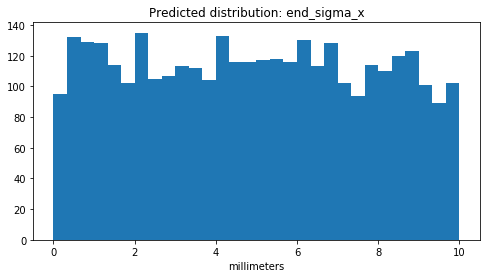

In [43]:
plt.figure(figsize = (8,4))
plt.title("Predicted distribution: "+ output_names[10])
plt.hist(Y_unscale_pred_scalar[:,10]*1E3, bins = 30, range = (0,10)); 
plt.xlabel('millimeters')

Text(0.5, 0, 'millimeters')

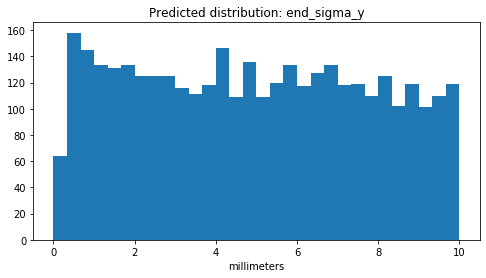

In [44]:
plt.figure(figsize = (8,4))
plt.title("Predicted distribution: "+ output_names[12])
plt.hist(Y_unscale_pred_scalar[:,12]*1E3, bins = 30, range = (0,10)); 
plt.xlabel('millimeters')

In [45]:
# names = ["X-dir. minimum", "X-dir. maximum", "Y-dir. minimum", "Y-dir. maximum"]
# for i in range(4):
#     indx = np.argsort(Y_unscale_test_scalar[:,scalar_outputs+i])
#     plt.plot(Y_unscale_test_scalar[indx,scalar_outputs+i]*1E3, 'k.', label = "Test Set")
#     plt.plot(Y_unscale_pred_scalar[indx,scalar_outputs+i]*1E3, 'r.', label = "Prediction")
#     plt.title("Ordered comparison for: " + names[i])
#     plt.ylabel('Millimeters')
#     plt.legend()
#     plt.xlabel("Sample Number")
#     plt.show()

In [127]:
# for i in indx[0:5]:
#     #ind = np.random.randint(np.shape(Y_unscale_test_scalar)[0])
#     ind = i
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,12))
#     #fig.suptitle('Test Set Image (left)  Predicted (middle)  Residual (right)')
    
#     ax1.imshow(Y_unscale_test_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax1.set_title('Test Set Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_test_scalar[ind,10]*1E3, Y_unscale_test_scalar[ind,12]*1E3))
#     ax1.set_xlabel('millimeters')
#     ax1.set_ylabel('millimeters')
#     ax2.imshow(Y_unscale_pred_img[ind].reshape(50,50), vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_pred_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     ax2.set_title('Predicted Image \n end_sigma_x = {:.2f}mm \n end_sigma_y = {:.2f}mm'.format(Y_unscale_pred_scalar[ind,10]*1E3, Y_unscale_pred_scalar[ind,12]*1E3))
#     ax2.set_xlabel('millimeters')
#     ax1.set_ylabel('millimeters')
    
    
#     res = Y_unscale_test_img[ind].reshape(50,50) - Y_unscale_pred_img[ind].reshape(50,50)
#     ax3.imshow(res, vmin = 0, vmax = np.max(Y_unscale_test_img[ind].reshape(50,50)), origin = "lower", extent = Y_unscale_test_scalar[ind,scalar_outputs:scalar_outputs+4]*1E3)
#     xerr = 100*(Y_unscale_pred_scalar[ind,10] - Y_unscale_test_scalar[ind,10])/Y_unscale_test_scalar[ind,10]
#     yerr = 100*(Y_unscale_pred_scalar[ind,12] - Y_unscale_test_scalar[ind,12])/Y_unscale_test_scalar[ind,12]
#     ax3.set_title('Residual \n % error end_sigma_x = {:.2f}% \n % error end_sigma_y = {:.2f}%'.format(xerr, yerr))
#     ax3.set_xlabel('millimeters')
#     ax3.set_ylabel('millimeters')
#     plt.show()

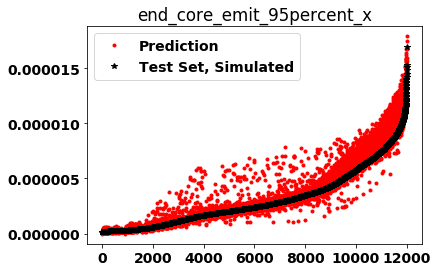

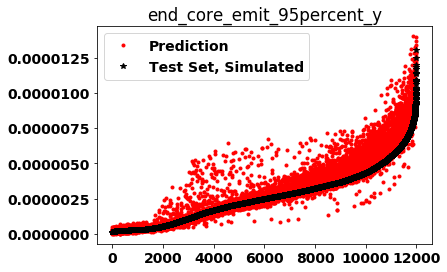

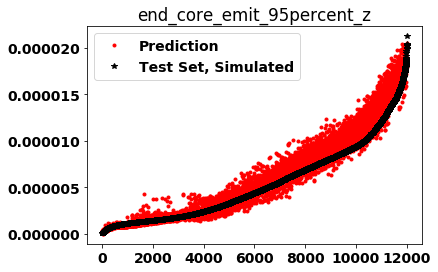

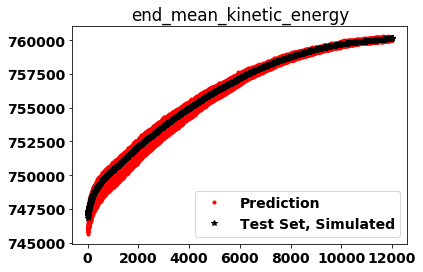

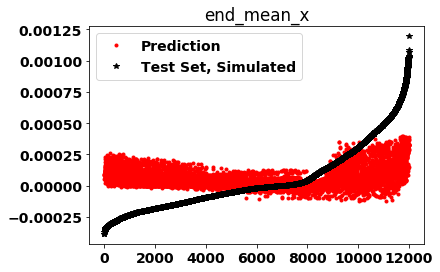

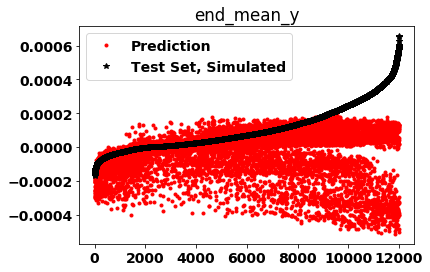

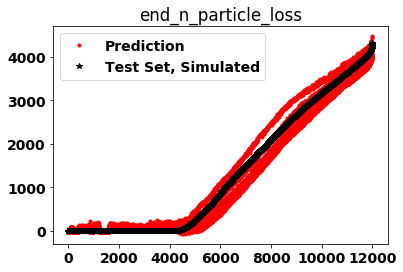

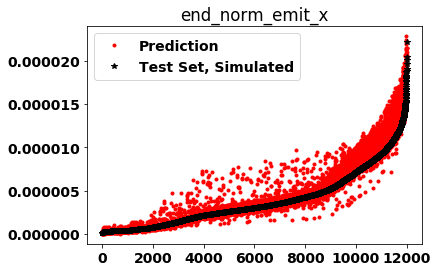

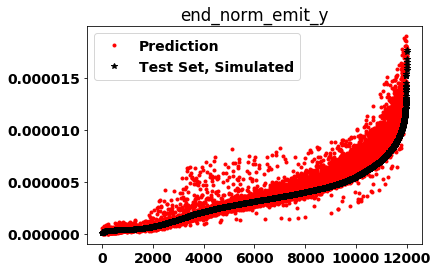

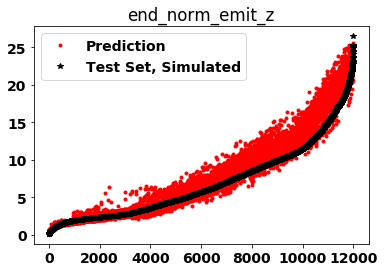

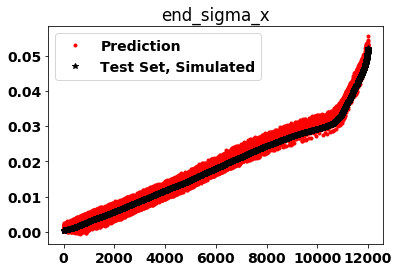

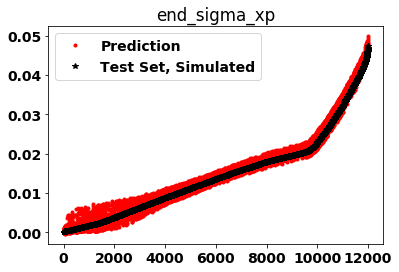

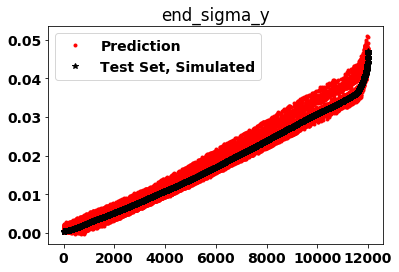

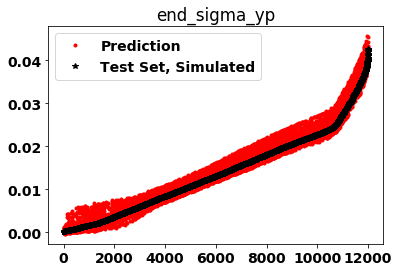

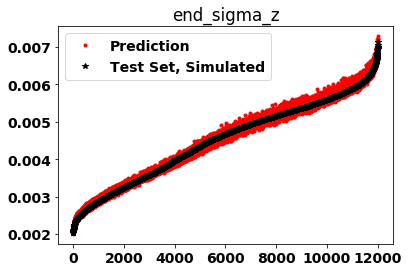

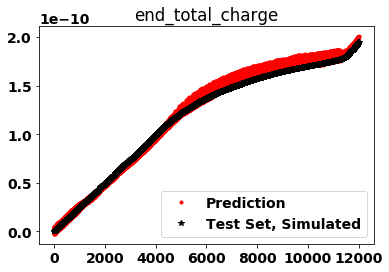

In [128]:
for i in range(scalar_outputs):
    indx = np.argsort(Y_unscale_test_scalar[:,i])
    
    plt.plot(Y_unscale_pred_scalar[indx,i], 'r.', label = "Prediction")
    plt.plot(Y_unscale_test_scalar[indx,i], 'k*', label = "Test Set, Simulated")
    plt.title(output_names[i])
    plt.legend()
    plt.show()

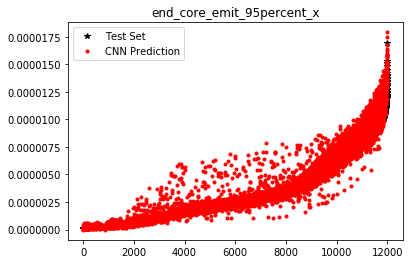

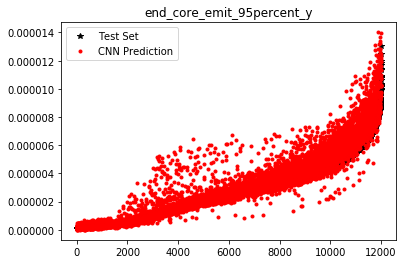

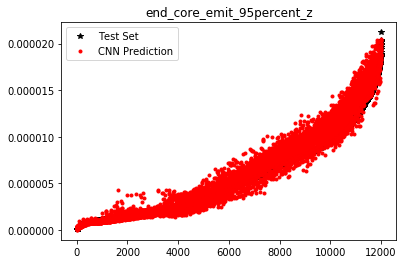

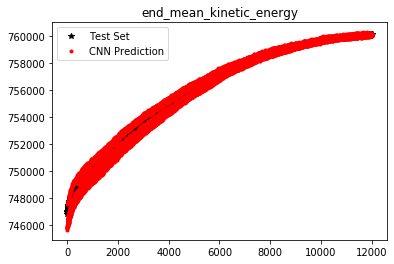

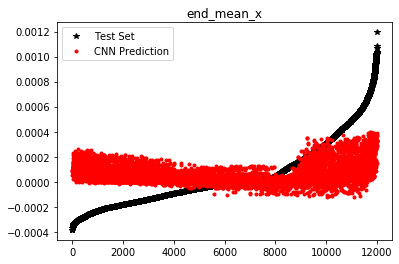

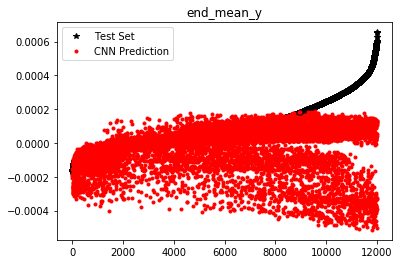

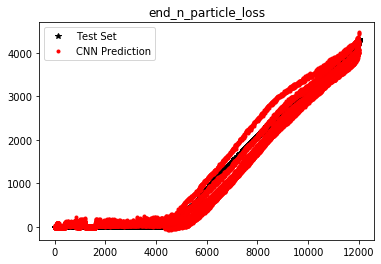

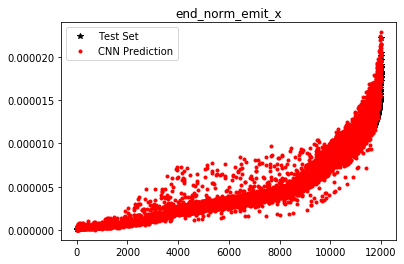

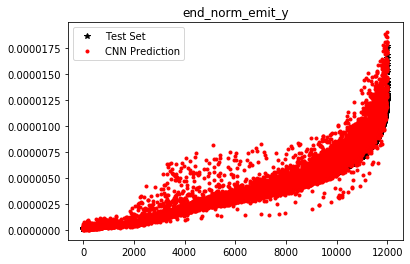

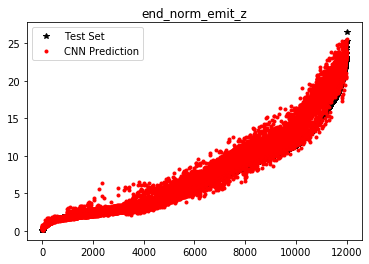

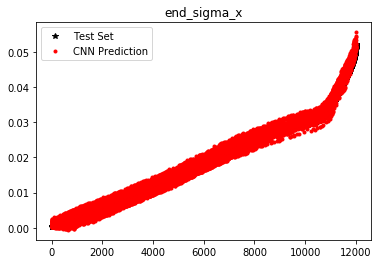

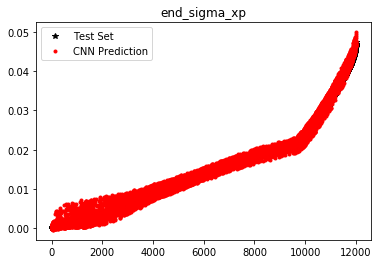

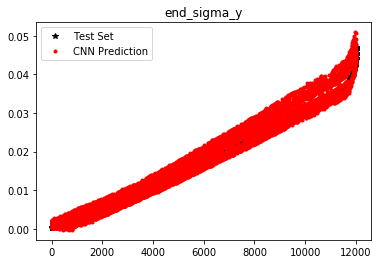

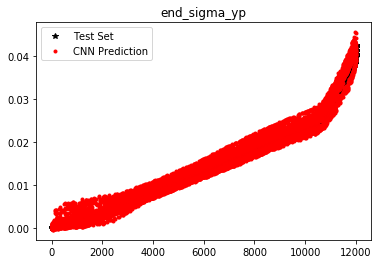

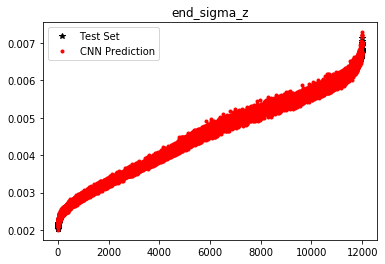

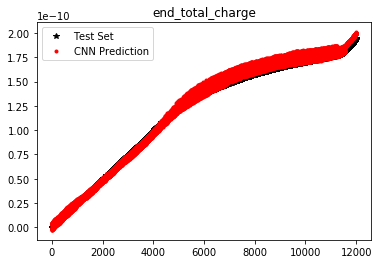

In [83]:
for i in range(scalar_outputs):
    indx = np.argsort(Y_unscale_test_scalar[:,i])
    plt.plot(Y_unscale_test_scalar[indx,i], 'k*', label = "Test Set")
    plt.plot(Y_unscale_pred_scalar[indx,i], 'r.', label = "CNN Prediction")
    plt.title(output_names[i])
    plt.legend()
    plt.show()

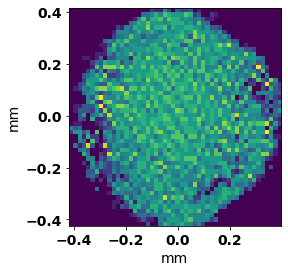

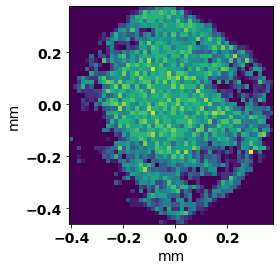

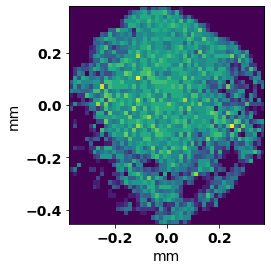

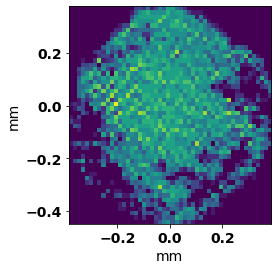

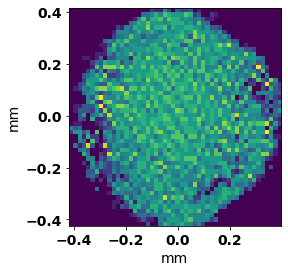

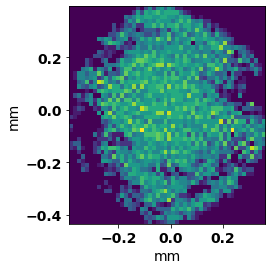

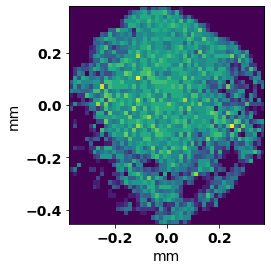

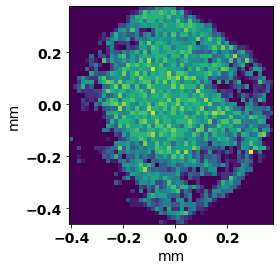

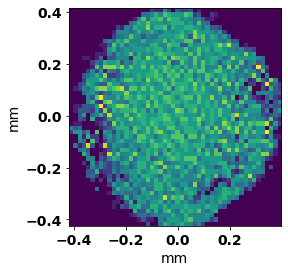

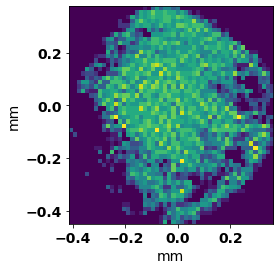

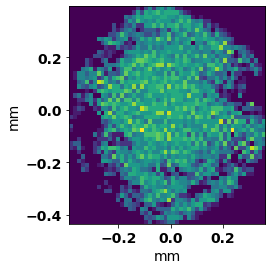

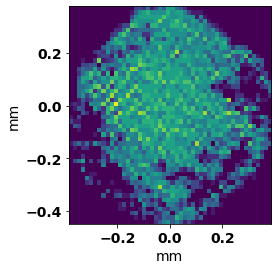

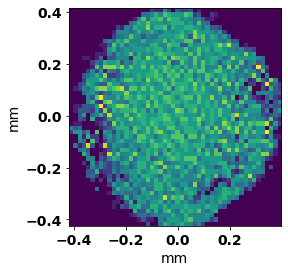

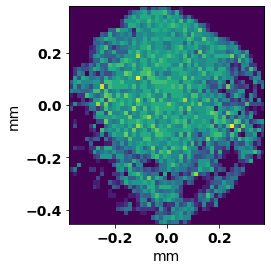

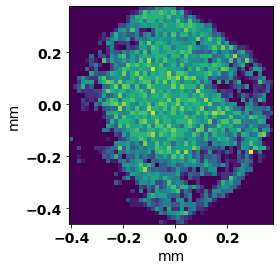

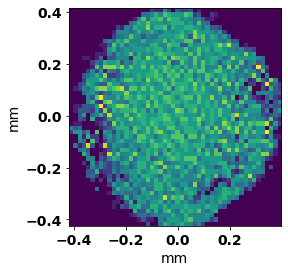

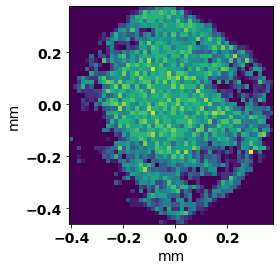

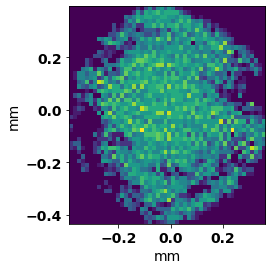

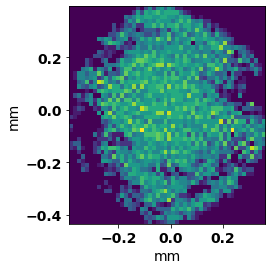

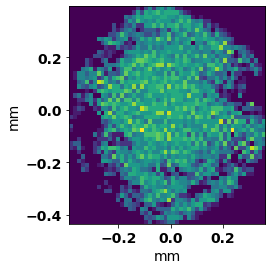

In [96]:

for i in range(0,20):

    ind = np.random.randint(np.shape(y_test_img)[0])
    plt.imshow(X_img[ind].reshape(50,50), extent = X_roi[ind, :])
    plt.xlabel('mm')
    plt.ylabel('mm')
    plt.show()

In [84]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 14}
import matplotlib
matplotlib.rc('font', **font)


def plot_img(img, img_roi, xlabel, ylabel,xunits,yunits,img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,vmin=False,vmax=False):
    
    extent=img_roi
    fig,ax = plt.subplots(nrows=1, ncols=1)
    if vmin:
           ax.imshow(img.reshape(bins,bins), extent=extent,cmap='viridis',vmin=vmin,vmax=vmax)
    else:
        ax.imshow(img.reshape(bins,bins), extent=extent,cmap='viridis')
    rect = ax.patch
    rect.set_facecolor("#440154FF")
    #ax.set_aspect('auto')
    ax.set_xlim((img_lim_xmin,img_lim_xmax))
    ax.set_ylim((img_lim_ymin,img_lim_ymax))
    plt.xlabel(xlabel+' '+xunits)
    plt.ylabel(ylabel+' '+yunits)
    
def get_img_lim_ranges(img_roi):
    img_lim_xmax = np.max(img_roi,axis=0)[1]
    img_lim_ymax = np.max(img_roi,axis=0)[3]
    
    img_lim_xmin = np.min(img_roi,axis=0)[0]
    img_lim_ymin = np.min(img_roi,axis=0)[2]
    return img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax

def plot_img_row(img, img_roi, ax,a,title,xlabel,ylabel,xuntis,yunits,img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,vmin=False,vmax=False,axscale=True):
    
    extent=tuple(img_roi)
    
    if vmin:
        img=ax[a].imshow(img.reshape(bins,bins), extent=extent,cmap='viridis',vmin=vmin,vmax=vmax)
    else:
        img=ax[a].imshow(img.reshape(bins,bins), extent=extent,cmap='viridis')
    
    rect = ax[a].patch
    rect.set_facecolor("#440154FF")
    if axscale==True:
        ax[a].set_xlim((img_lim_xmin,img_lim_xmax))
        ax[a].set_ylim((img_lim_ymin,img_lim_ymax))
        ax[a].set_aspect('equal')
    #plt.xlabel(xlabel+' '+xunits)
    #plt.ylabel(ylabel+' '+yunits)
    ax[a].set_aspect('equal')
    
    plt.tight_layout()
    
    return ax,img



def x_projection(image, axis=0, subtract_baseline=True):
    """Expects ndarray, return x projection"""
    proj = np.sum(image, axis=0)
    if subtract_baseline:
        return proj - min(proj)

    return proj

def y_projection(image, subtract_baseline=True):
    """Expects ndarray, return y projection"""
    proj = np.sum(image, axis=1)
    if subtract_baseline:
        return proj - min(proj)
    
    return proj

In [85]:
inds = np.where(Y_unscale_test_scalar[:,scalar_outputs]*1E3 > -25)


In [86]:
Y_unscale_test_scalar[:,scalar_outputs]*1E3

array([ -0.91643468,  -4.57465485,  -5.58178795, ..., -91.30894588,
       -76.23466543, -37.10447431])

In [90]:
y_pred_img_roi = Y_unscale_pred_scalar[inds[0],scalar_outputs:scalar_outputs+4]*1E3
y_test_img_roi = Y_unscale_test_scalar[inds[0],scalar_outputs:scalar_outputs+4]*1E3

y_pred_img = Y_unscale_pred_img[inds]
y_test_img = Y_unscale_test_img[inds]

# plot with real limits
img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax = get_img_lim_ranges(y_test_img_roi)
print(img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax)

X_img = X_unscale_test_img[inds[0]]
X_roi = X_unscale_test_scalar[inds[0], scalar_variables:scalar_variables+4]*1E3

-24.998341784609995 26.040225621719998 -25.865287184200003 26.03359679487


In [91]:
xlabel, ylabel, xunits, yunits = ["", "", "mm", "mm"]
bins = 50

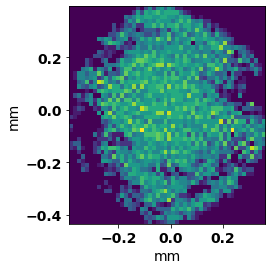

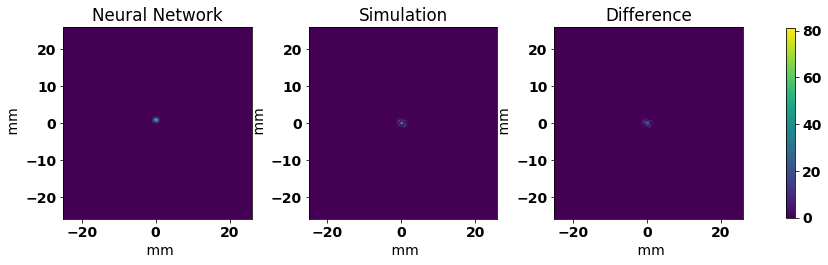

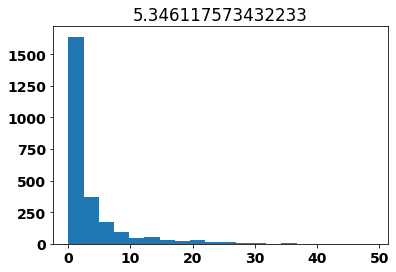

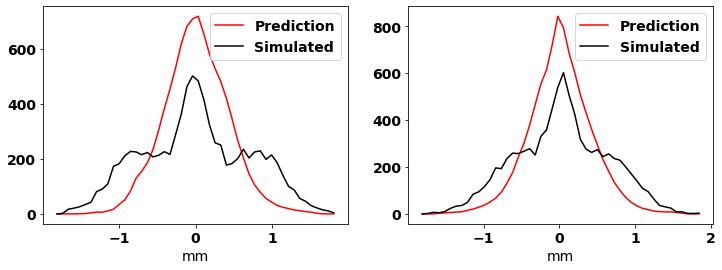

limits predicted mm : [-2.17013806  2.01245723 -1.14996731  2.44907872]
limits true mm      : [-1.8117235   1.80577355 -1.81109032  1.84238853]
------------------------------------------------------------------------
------------------------------------------------------------------------


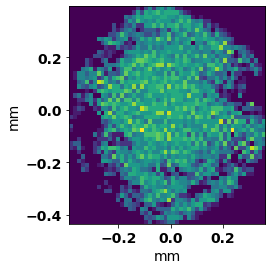

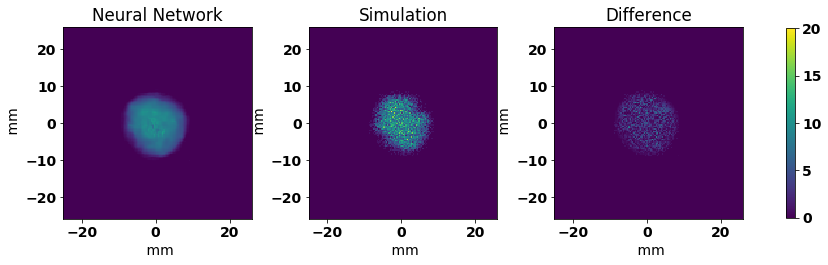

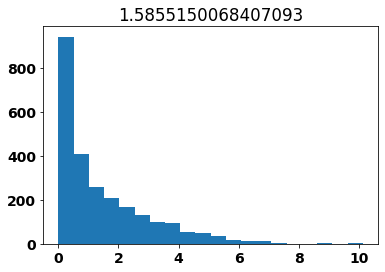

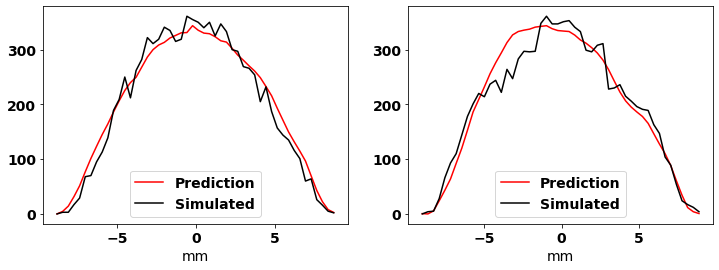

limits predicted mm : [ -9.53028351   9.21911001 -10.14145464   9.28387418]
limits true mm      : [-8.7944162   8.72390579 -8.95762236  8.84409637]
------------------------------------------------------------------------
------------------------------------------------------------------------


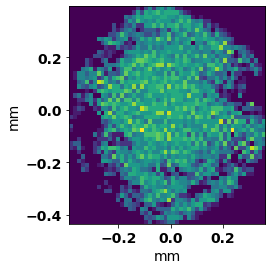

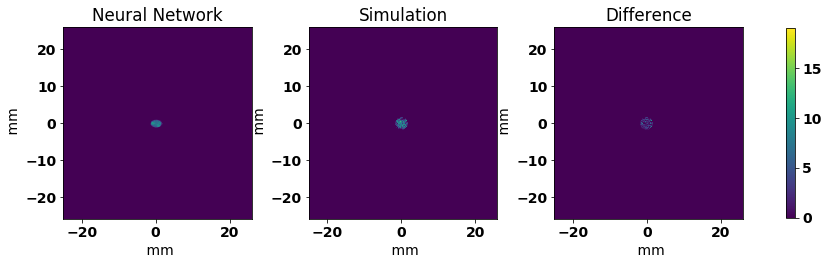

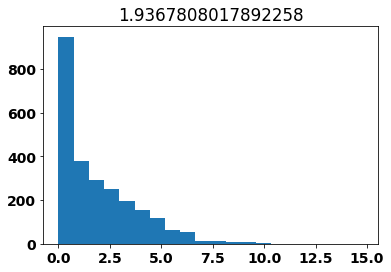

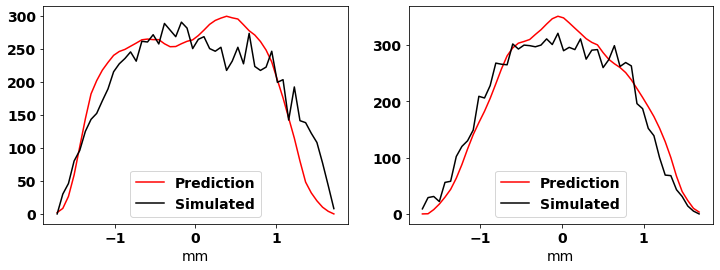

limits predicted mm : [-1.61587447  1.8085083  -1.16502494  1.22957292]
limits true mm      : [-1.71677941  1.71889117 -1.70747862  1.67759816]
------------------------------------------------------------------------
------------------------------------------------------------------------


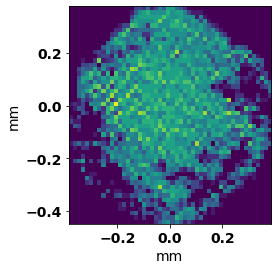

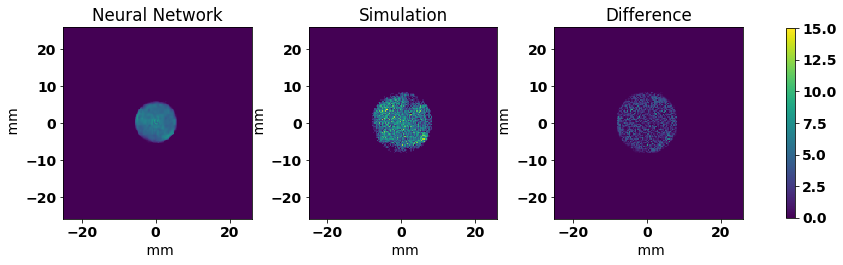

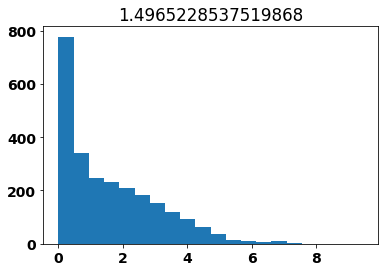

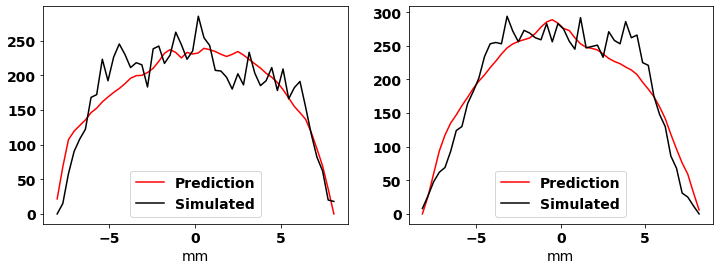

limits predicted mm : [-5.60141355  5.57465758 -5.46427816  5.84541727]
limits true mm      : [-8.05007477  8.10244279 -8.18161696  8.18642768]
------------------------------------------------------------------------
------------------------------------------------------------------------


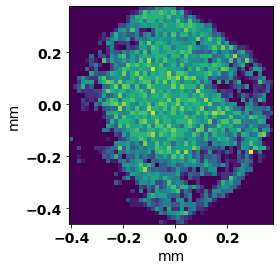

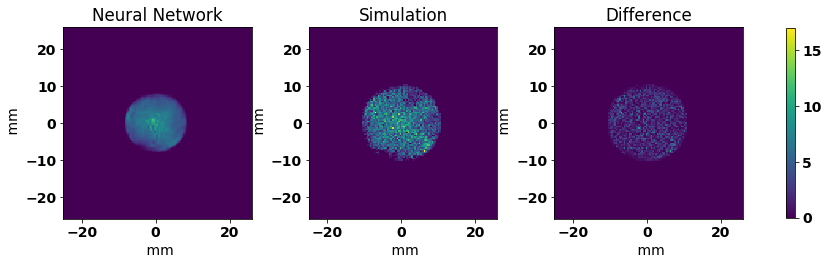

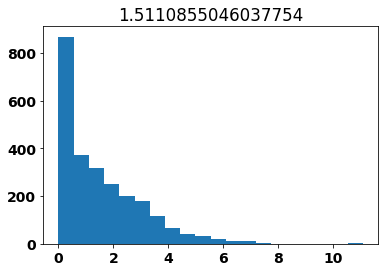

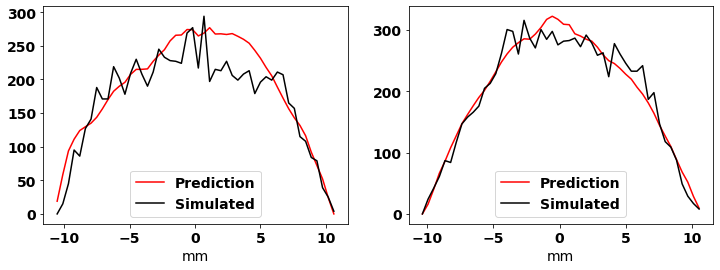

limits predicted mm : [-8.25311989  8.34162533 -7.89341331  7.95285404]
limits true mm      : [-10.54749997  10.61771759 -10.33068426  10.49608416]
------------------------------------------------------------------------
------------------------------------------------------------------------


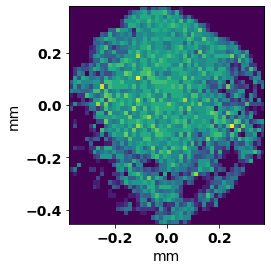

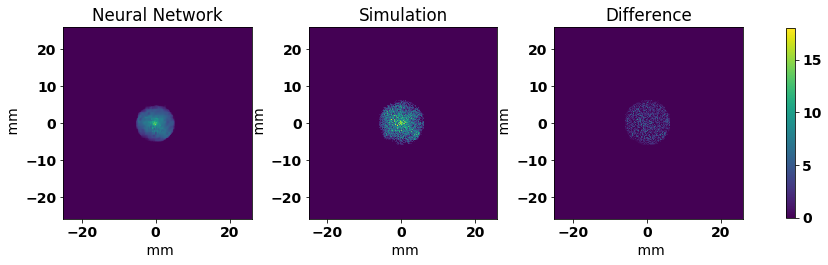

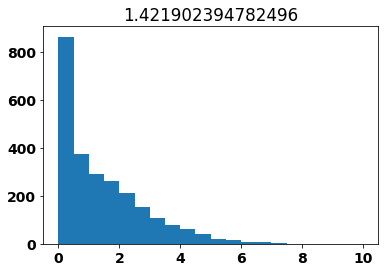

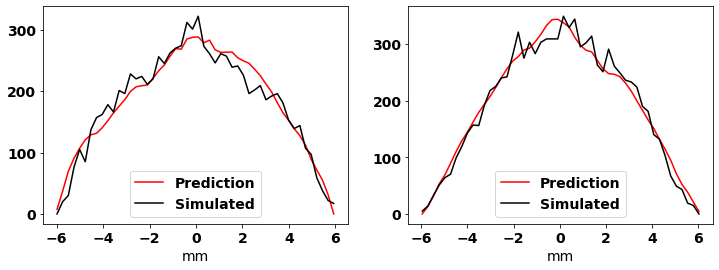

limits predicted mm : [-5.29395044  5.22185862 -5.06061316  4.75141592]
limits true mm      : [-5.98590593  5.9332089  -5.95432429  6.02881314]
------------------------------------------------------------------------
------------------------------------------------------------------------


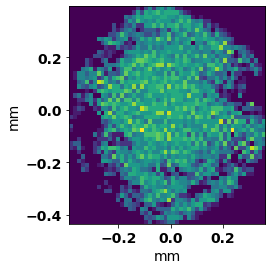

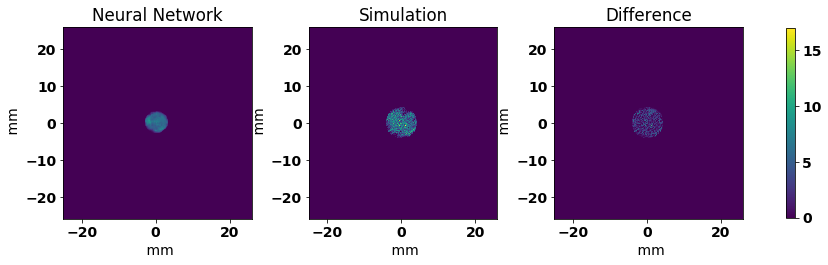

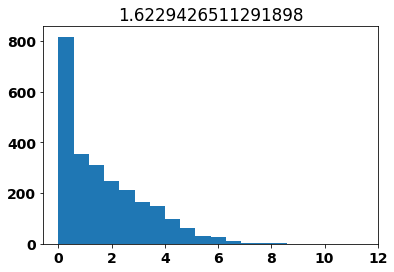

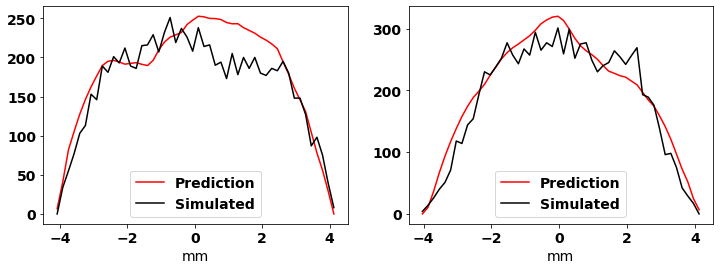

limits predicted mm : [-2.97593325  3.1374828  -2.75915861  3.12744663]
limits true mm      : [-4.08499187  4.12562039 -4.03837876  4.12589138]
------------------------------------------------------------------------
------------------------------------------------------------------------


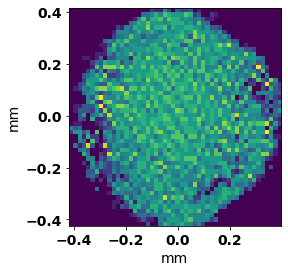

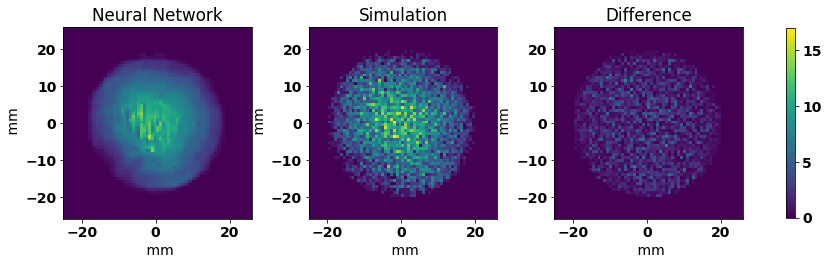

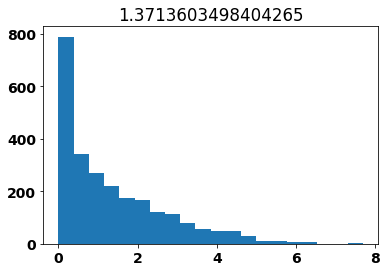

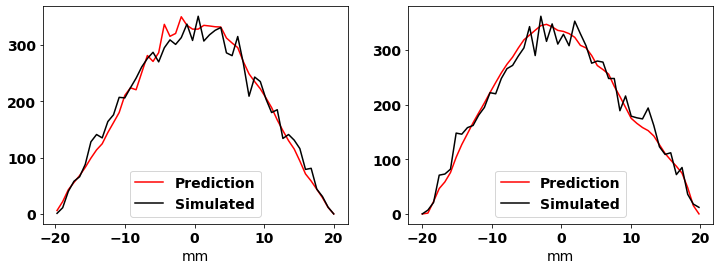

limits predicted mm : [-18.45180988  18.38115975 -19.02451366  18.9492777 ]
limits true mm      : [-19.7749615   19.98141125 -19.96595132  19.79208827]
------------------------------------------------------------------------
------------------------------------------------------------------------


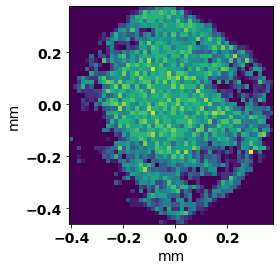

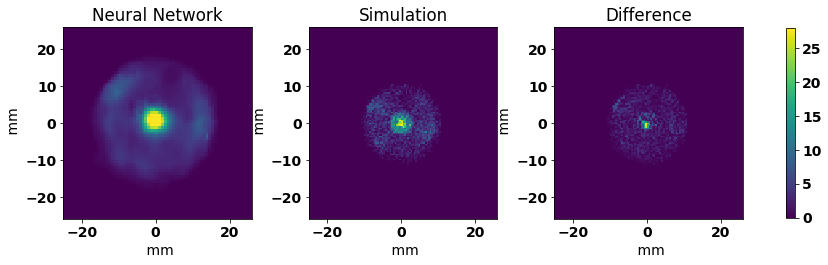

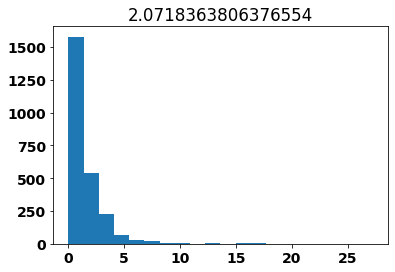

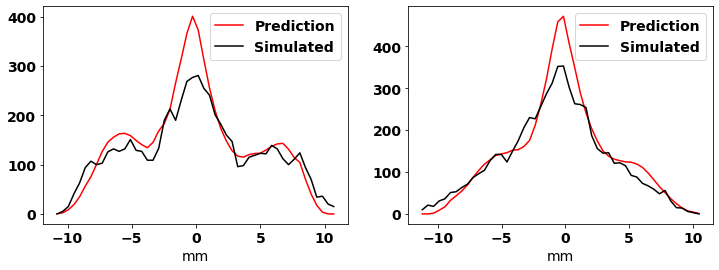

limits predicted mm : [-18.95722747  18.56309175 -18.67672056  20.06723173]
limits true mm      : [-10.81512257  10.71654155 -11.21493156  10.46834684]
------------------------------------------------------------------------
------------------------------------------------------------------------


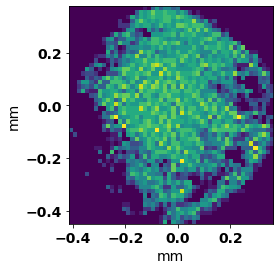

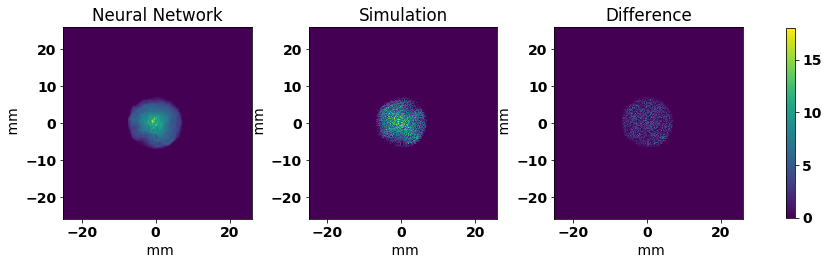

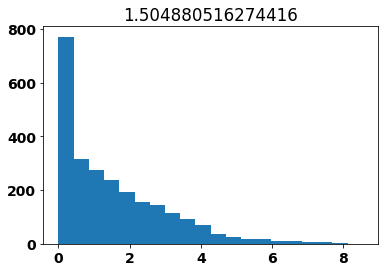

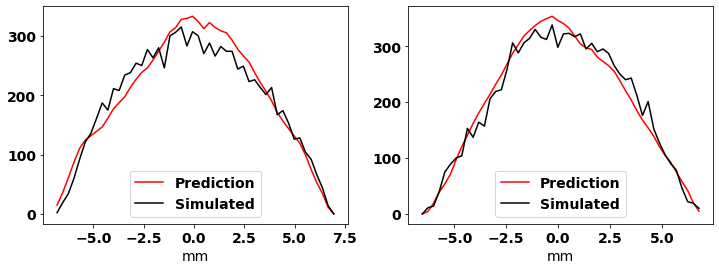

limits predicted mm : [-7.41279125  7.43207941 -7.01092184  6.8919193 ]
limits true mm      : [-6.8018139   6.94303156 -6.54566907  6.7927257 ]
------------------------------------------------------------------------
------------------------------------------------------------------------


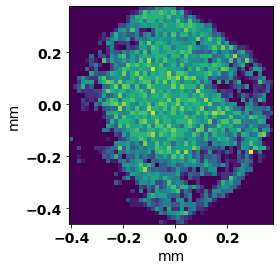

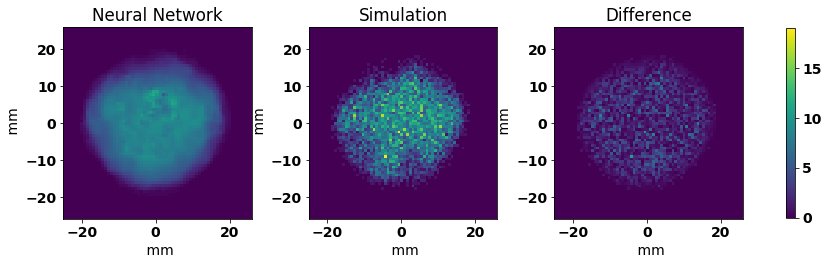

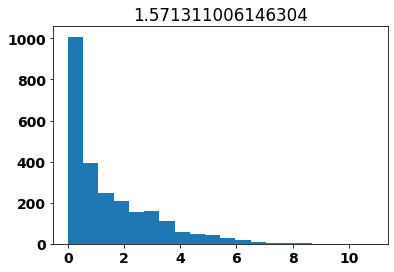

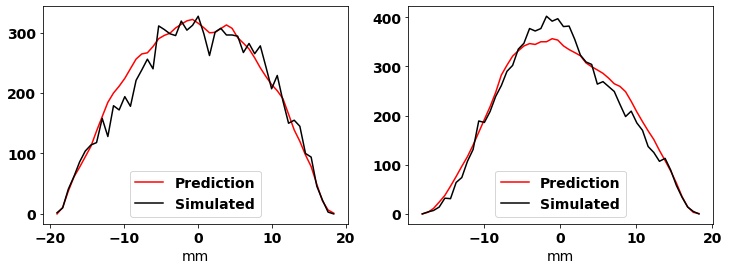

limits predicted mm : [-20.43069899  20.32130398 -19.59293336  19.98792402]
limits true mm      : [-19.00354284  18.37551491 -18.13191538  18.22707102]
------------------------------------------------------------------------
------------------------------------------------------------------------


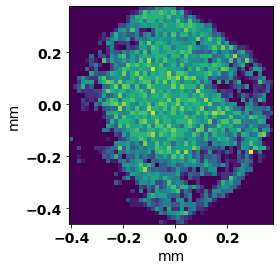

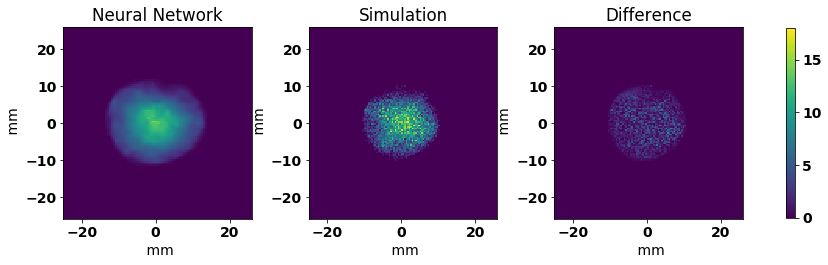

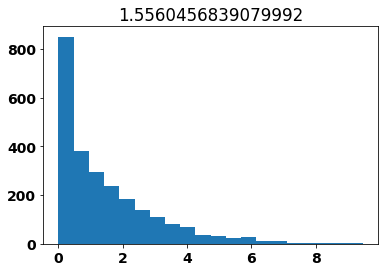

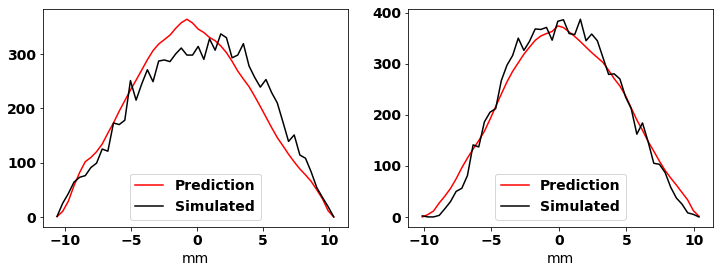

limits predicted mm : [-13.60955089  13.78414966 -11.5455091   11.83532737]
limits true mm      : [-10.59771491  10.38046263 -10.09665494  10.36277993]
------------------------------------------------------------------------
------------------------------------------------------------------------


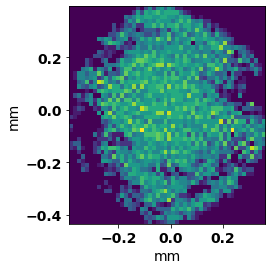

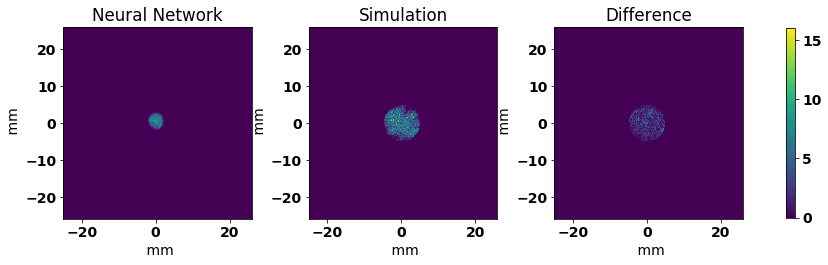

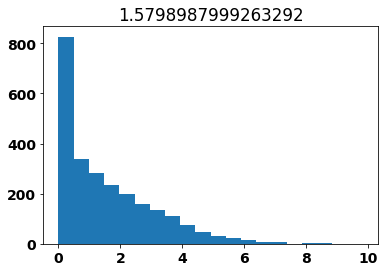

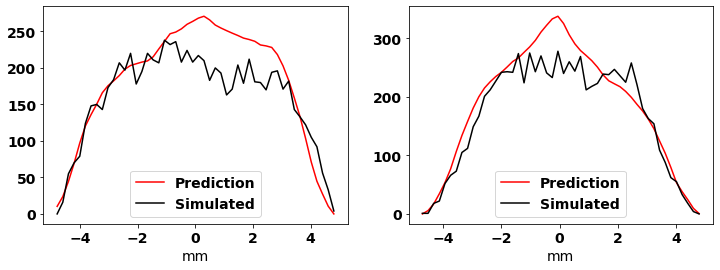

limits predicted mm : [-2.16372311  1.94116402 -1.72755867  2.92824116]
limits true mm      : [-4.78938933  4.80373596 -4.70557294  4.78185023]
------------------------------------------------------------------------
------------------------------------------------------------------------


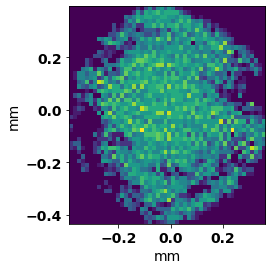

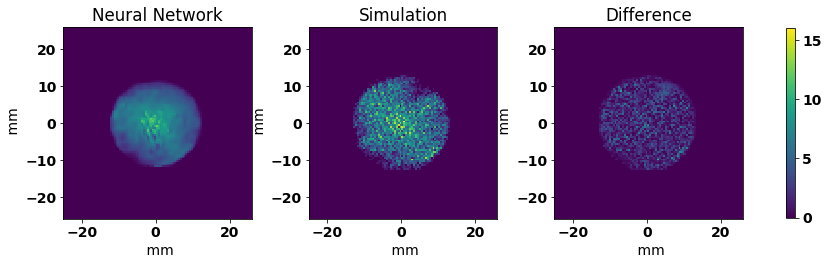

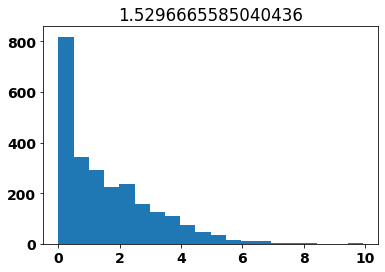

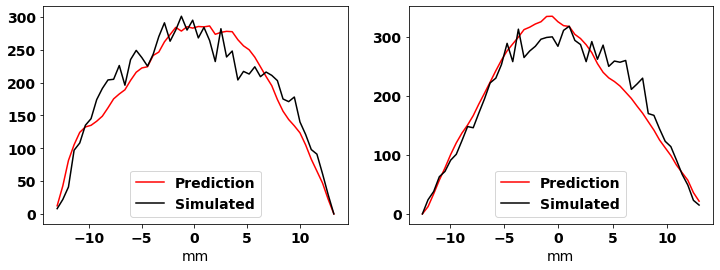

limits predicted mm : [-12.29143143  12.55969238 -11.72748208  11.59858797]
limits true mm      : [-12.98681275  13.21150694 -12.57950164  12.9962793 ]
------------------------------------------------------------------------
------------------------------------------------------------------------


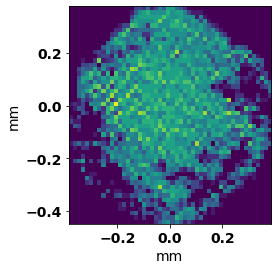

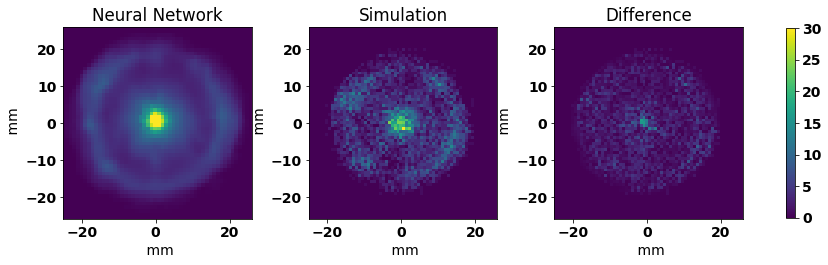

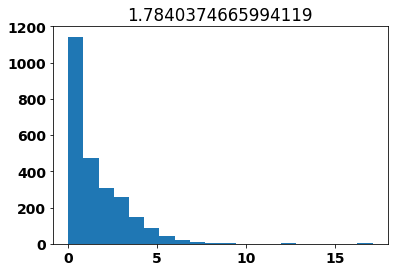

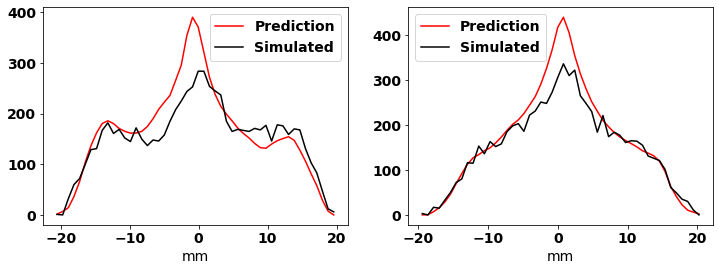

limits predicted mm : [-24.58910644  24.95808713 -24.27910268  26.50338225]
limits true mm      : [-20.54891272  19.59402082 -19.43960309  20.24149458]
------------------------------------------------------------------------
------------------------------------------------------------------------


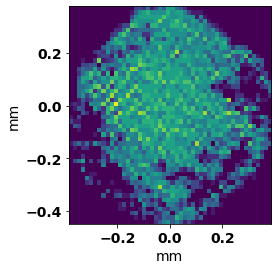

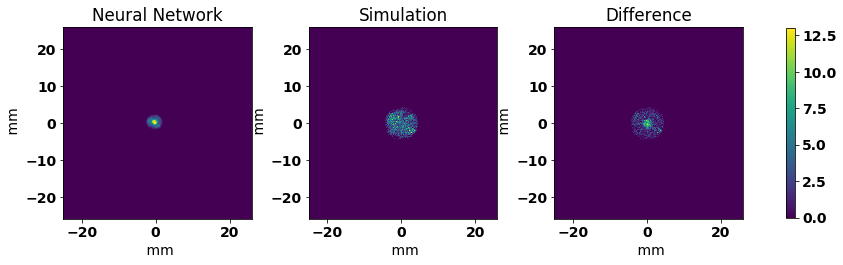

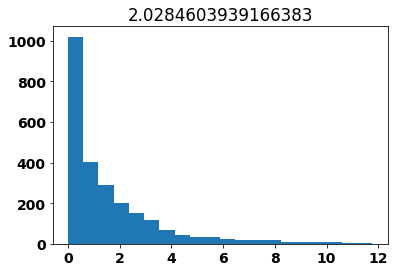

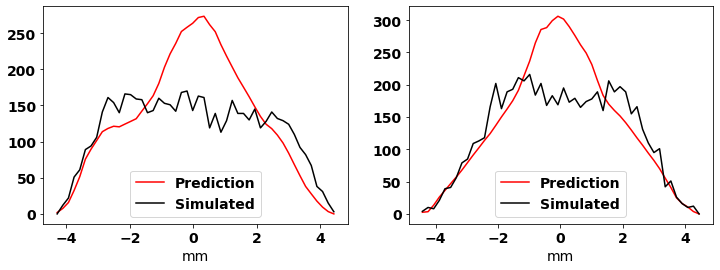

limits predicted mm : [-2.57991254  1.95190299 -1.88623369  2.29696976]
limits true mm      : [-4.28840617  4.43002326 -4.4212689   4.43972822]
------------------------------------------------------------------------
------------------------------------------------------------------------


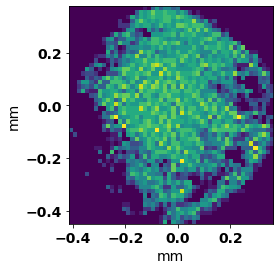

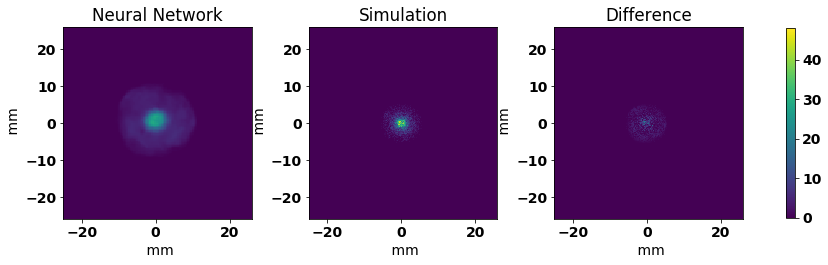

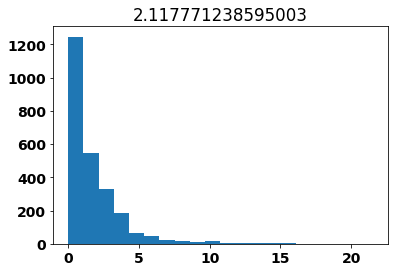

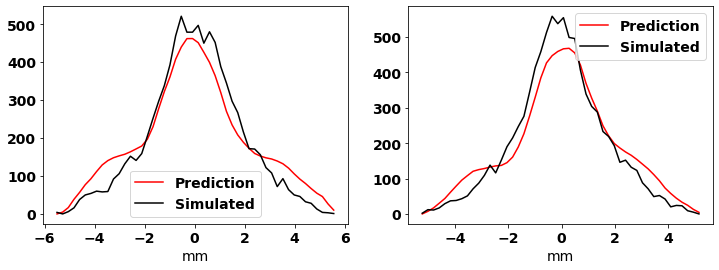

limits predicted mm : [-10.97876579  11.14753541  -9.13636386  10.84751636]
limits true mm      : [-5.501414    5.56268682 -5.23033585  5.15069798]
------------------------------------------------------------------------
------------------------------------------------------------------------


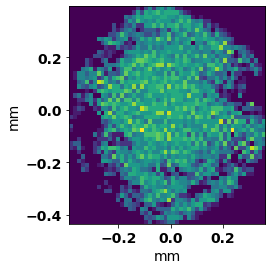

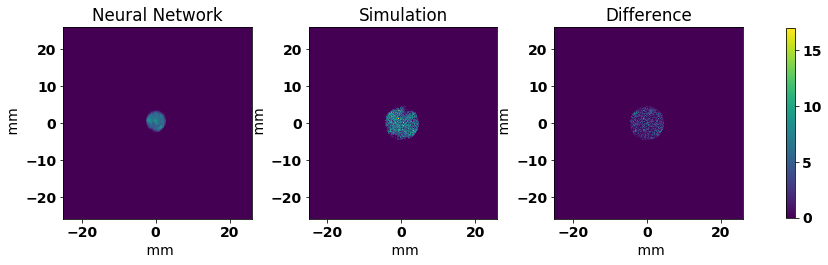

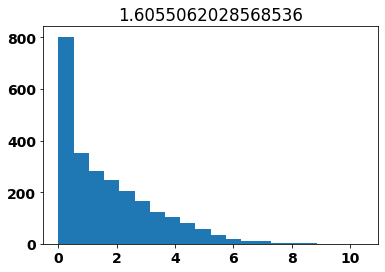

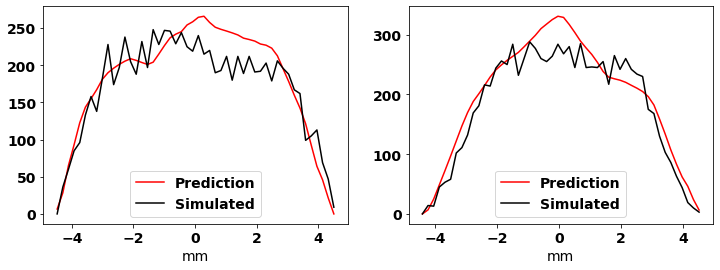

limits predicted mm : [-2.68205255  2.5279657  -2.49832869  3.3236153 ]
limits true mm      : [-4.48091605  4.51232773 -4.41564936  4.51682755]
------------------------------------------------------------------------
------------------------------------------------------------------------


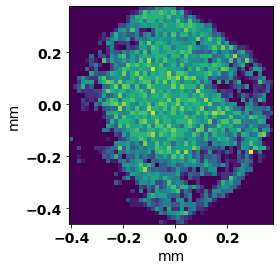

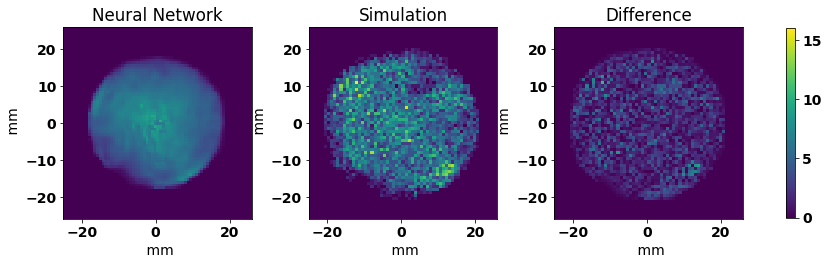

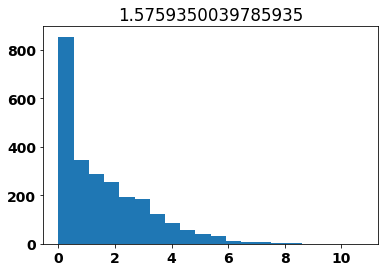

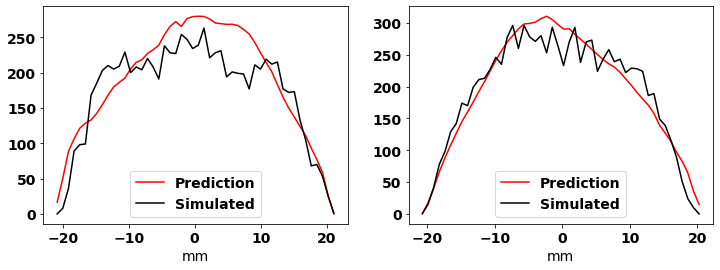

limits predicted mm : [-18.43919605  18.54129694 -17.88175106  17.94880256]
limits true mm      : [-20.82815467  21.08244811 -20.71506974  20.28099163]
------------------------------------------------------------------------
------------------------------------------------------------------------


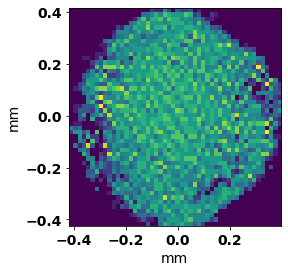

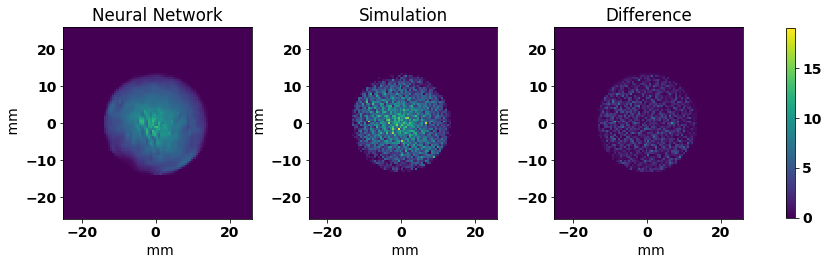

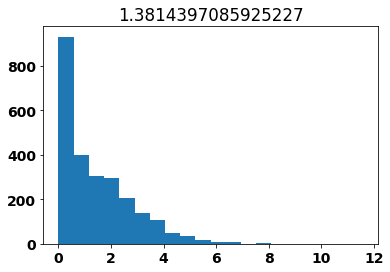

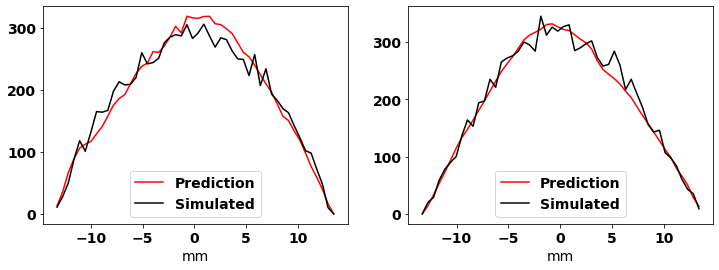

limits predicted mm : [-14.05293494  13.91824242 -13.99388909  13.60650826]
limits true mm      : [-13.25570748  13.44846311 -13.31044701  13.401438  ]
------------------------------------------------------------------------
------------------------------------------------------------------------


In [92]:
for i in range(0,20):

    ind = np.random.randint(np.shape(y_test_img )[0])
    plt.imshow(X_img[ind].reshape(50,50), extent = X_roi[ind, :])
    plt.xlabel('mm')
    plt.ylabel('mm')
    plt.show()
    vmint = np.min(y_test_img[ind,:])
    vmaxt = np.max(y_test_img[ind,:])
    y_test_img_diffs = np.abs(y_test_img[ind,:]-y_pred_img[ind,:])
    
    fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(13, 7))
    titles = ['Neural Network', 'Simulation', 'Difference']
    
    vm =1e-55
    axs,im=plot_img_row(y_pred_img[ind,:],
                        y_pred_img_roi[ind,:],
                        axs, 0, 
                        titles[0], xlabel, ylabel, xunits, yunits, 
                        img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,
                        vmin = vm,vmax = vmaxt)
    
    axs,im=plot_img_row(y_test_img[ind,:],
                        y_test_img_roi[ind,:],
                        axs, 1, 
                        titles[1], xlabel, ylabel, xunits, yunits, 
                        img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,
                        vmin = vm,vmax = vmaxt)
    
    axs,im=plot_img_row(y_test_img_diffs,
                        y_test_img_roi[ind,:],
                        axs, 2, 
                        titles[2], xlabel, ylabel, xunits, yunits, 
                        img_lim_xmin, img_lim_xmax, img_lim_ymin, img_lim_ymax,
                        vmin = vm,vmax = vmaxt)
    
    axs[0].title.set_text(titles[0])
    axs[1].title.set_text(titles[1])
    axs[2].title.set_text(titles[2])

    axs[0].set_xlabel(xlabel+' '+xunits)
    axs[0].set_ylabel(ylabel+' '+yunits)

    axs[1].set_xlabel(xlabel+' '+xunits)
    axs[1].set_ylabel(ylabel+' '+yunits)

    axs[2].set_xlabel(xlabel+' '+xunits)
    axs[2].set_ylabel(ylabel+' '+yunits)
    fig.tight_layout()
    fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.4)
    plt.show()
    
    plt.hist(y_test_img_diffs.flatten(), bins = 20)
    plt.title(np.std(y_test_img_diffs.flatten()))
    plt.show()
    
    ## x projections
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
    
    xproj_pred = x_projection(y_pred_img[ind,:].reshape(bins,bins))
    xproj_test = x_projection(y_test_img[ind,:].reshape(bins,bins))
    ax[0].plot(np.linspace(y_test_img_roi[ind,0], y_test_img_roi[ind,1], 50), xproj_pred, 'r', label = "Prediction")
    ax[0].plot(np.linspace(y_test_img_roi[ind,0], y_test_img_roi[ind,1], 50), xproj_test, 'k', label = "Simulated")
    ax[0].set_xlabel("mm")
    ax[0].legend()
    
    yproj_pred = y_projection(y_pred_img[ind,:].reshape(bins,bins))
    yproj_test = y_projection(y_test_img[ind,:].reshape(bins,bins))
    ax[1].plot(np.linspace(y_test_img_roi[ind,2], y_test_img_roi[ind,3], 50), yproj_pred, 'r', label = "Prediction")
    ax[1].plot(np.linspace(y_test_img_roi[ind,2], y_test_img_roi[ind,3], 50), yproj_test, 'k', label = "Simulated")
    ax[1].set_xlabel("mm")
    ax[1].legend()
    plt.show()

    print('limits predicted '+str(xunits)+' :', y_pred_img_roi[ind,:])
    print('limits true '+ str(yunits)+'      :', y_test_img_roi[ind,:])
    print('------------------------------------------------------------------------')
    print('------------------------------------------------------------------------')

In [75]:
split_test = {}
for i, name in enumerate(inds[0]):
    name = str(name)
    split_test[str(i)] = all_test[name]

In [77]:
split_test["0"]["scalar_output_percent_error"]

array([ 1.63602398e+02,  1.42545813e+02,  1.14531967e+02, -1.98984358e-03,
       -2.33734784e+02,  1.91417554e+03,             inf,  1.99664554e+02,
        1.82528903e+02,  1.02100169e+02,  2.46135401e+02,  7.45197724e+01,
        2.02200814e+02,  3.16368991e+01,  7.61132882e+00,  3.47046187e+02,
        1.68685541e+02,  1.31624595e+02,  1.19333030e+02,  1.54414506e+02])

In [74]:
all_test["0"]["scalar_output_percent_error"]

array([ 1.63602398e+02,  1.42545813e+02,  1.14531967e+02, -1.98984358e-03,
       -2.33734784e+02,  1.91417554e+03,             inf,  1.99664554e+02,
        1.82528903e+02,  1.02100169e+02,  2.46135401e+02,  7.45197724e+01,
        2.02200814e+02,  3.16368991e+01,  7.61132882e+00,  3.47046187e+02,
        1.68685541e+02,  1.31624595e+02,  1.19333030e+02,  1.54414506e+02])

In [123]:
name = "testing"
description = "testinggggg"
input_names = ['maxb(2)', 'phi(1)', 'total_charge:value','in_xmin', 'in_xmax', 'in_ymin', 'in_ymax']
input_units = ['kG', 'Deg', 'PicoCoul', 'mm','mm','mm','mm']
input_defaults = [0.1, 0, 75, -0.40510409,  0.37911152, -0.42488133,  0.41626165]
input_ranges = [[0,0.1], [-10,10], [0,300], [-1,1], [-1,1], [-1,1],[-1,1]]
output_names = ['end_core_emit_95percent_x', 'end_core_emit_95percent_y', 'end_core_emit_95percent_z', 'end_mean_kinetic_energy', 'end_mean_x', 'end_mean_y', 'end_n_particle_loss', 'end_norm_emit_x', 'end_norm_emit_y', 'end_norm_emit_z', 'end_sigma_x', 'end_sigma_xp', 'end_sigma_y', 'end_sigma_yp', 'end_sigma_z', 'end_total_charge', 'out_xmin', 'out_xmax', 'out_ymin', 'out_ymax']
output_units = ["meter-radians","meter-radians","meter-radians","Electron-volts (eV)","meters","meters","Number","meter-radians","meter-radians","meter-radians","meters","radians","meters","radians","meters","Coulombs (C)","Meters (m)","Meters (m)","Meters (m)","Meters (m)"]

my_description = basicFunctions.makeDescription(
    name, 
    description, 
    input_names,
    input_units,
    input_defaults, 
    input_ranges,
    output_names, 
    output_units)

with open('my_description.json', 'w') as f:
    json.dump(my_description, f)

In [124]:
mse = np.mean((Y_unscale_test_scalar - Y_unscale_pred_scalar)**2, axis = 0)

In [125]:
pererr = np.mean(100*np.abs(Y_unscale_test_scalar - Y_unscale_pred_scalar)/Y_unscale_test_scalar, axis = 0)

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [126]:
for i, name in enumerate(output_names):
    print(name, pererr[i])

end_core_emit_95percent_x 17.73680319991571
end_core_emit_95percent_y 19.246401685551902
end_core_emit_95percent_z 14.709381737034336
end_mean_kinetic_energy 0.041377888140537486
end_mean_x -42.924811596695925
end_mean_y 39.03733610605677
end_n_particle_loss inf
end_norm_emit_x 16.647121300833216
end_norm_emit_y 18.053051979662435
end_norm_emit_z 15.076349707399
end_sigma_x 14.952186772207645
end_sigma_xp 18.032569098870695
end_sigma_y 16.240884795720078
end_sigma_yp 20.05745953205356
end_sigma_z 2.0244566136245443
end_total_charge 10.328114053705532
out_xmin -14.591940200133143
out_xmax 15.61719148147374
out_ymin -13.925122344906026
out_ymax 15.586646127716168
